In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# cellbin plot
def query(adata,cdr3):
    csr = adata[:,cdr3].X
    non_zero_indices = np.nonzero(csr)[0]
    obs_with_value = adata.obs_names[non_zero_indices]
    return list(obs_with_value)

In [7]:
import sys
sys.path.append('/storage/liuyi/11.spaxcr//code')
import spaxcr
import importlib

<module 'spaxcr.extra.radialtree' from '/storage/liuyi/11.spaxcr//code/spaxcr/extra/radialtree.py'>

In [8]:
cellbin = sc.read_h5ad('/storage/liuyi/09.ma_tcr/bulid_meta/ibd_umi/IBD.cellbin.h5ad')

In [9]:
bin50 = sc.read_h5ad('/storage/liuyi/09.ma_tcr/bulid_meta/ibd_umi/IBD.bin50.h5ad')
rna = sc.read_h5ad('/home/zangyupeng/05.ExtendDisk/00.Data/07.NBT/ST/IBD/B03501C4_norm.h5ad')
rna.obs_names = rna.obs_names.map(lambda x : 'DNB_' + x.split('@')[1])

In [10]:
def combine_cellbin_binadata(cellbin_adata,bin_adata,obs,binsize = 50,basis = 'spatial'):
    rnaobs = bin_adata.obs.copy()
    rnaobs['x'] = bin_adata.obsm[basis][:,0]
    rnaobs['y'] = bin_adata.obsm[basis][:,1]
    rnaobs['id'] = rnaobs['x'].map(str) + '_' + rnaobs['y'].map(str) 
    match_dict = dict(zip(rnaobs['id'],rnaobs[obs]))
    cellbin_adataobs = cellbin_adata.obs.copy()
    cellbin_adataobs['id'] = (cellbin_adataobs['x']//binsize*binsize).astype(int).astype(str) + '_'+(cellbin_adataobs['y']//binsize*binsize).astype(int).astype(str)
    cellbin_adataobs['add'] = cellbin_adataobs['id'].map(match_dict)
    cellbin_adata.obs[obs] = cellbin_adataobs['add']

In [11]:
cellbin = spaxcr.pp.updatexcr(cellbin)
bin50 = spaxcr.pp.updatexcr(bin50)

Chain
> Update IGH-CDR3: 103 → 103
> Update IGK-CDR3: 192 → 192
> Update IGL-CDR3: 138 → 138
> Update TRA-CDR3: 4 → 4
> Update TRB-CDR3: 69 → 69

BCR Isotype:
>> Update IGHA-CDR3: 94 → 94
>> Update IGHG-CDR3: 8 → 8
Chain
> Update IGH-CDR3: 1061 → 1061
> Update IGK-CDR3: 1002 → 1002
> Update IGL-CDR3: 728 → 728
> Update TRA-CDR3: 13 → 13
> Update TRB-CDR3: 124 → 124

BCR Isotype:
>> Update IGHA-CDR3: 968 → 968
>> Update IGHG-CDR3: 45 → 45


In [12]:
clonefile = "/storage/fengyu/liuzhong/Mixcr_align/PE150_data_analyze/combine/IBD1-B03501C4-combine/IBD1-B03501C4-combine.contigs.tsv"
spaxcr.pp.addmutation(cellbin,clonefile = clonefile)
spaxcr.pp.addmutation(bin50,clonefile = clonefile)

In [13]:
rna = rna[rna.obs['annotation']!='low_quality_bins']

In [14]:
clustermap = {'TLS':'TLS',
 'immune_aggregates_center':'Plasma cell aggregates center',
 'immune_aggregates_myeloid':'Ciliated epithelia',
 'immune_aggregates_peripheral':'Plasma cell aggregates peripheral',
 'mucusa':'Lamina propria',
 'stroma':'Stroma'
}
rna.obs['annotation2'] = rna.obs['annotation'].map(clustermap)

/tmp/ipykernel_256121/3379274536.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna.obs['annotation2'] = rna.obs['annotation'].map(clustermap)


In [15]:
rna.obsm['real'] = rna.obs[['x','y']].values
combine_cellbin_binadata(cellbin,rna,obs = 'annotation2',binsize = 50,basis = 'real')
combine_cellbin_binadata(cellbin,rna,obs = 'label',binsize = 50,basis = 'real')

In [16]:
cellbin = cellbin[~cellbin.obs['annotation2'].isna()].copy()

In [17]:
cellbin = spaxcr.pp.updatexcr(cellbin)

Chain
> Update IGH-CDR3: 103 → 98
> Update IGK-CDR3: 192 → 185
> Update IGL-CDR3: 138 → 132
> Update TRA-CDR3: 4 → 4
> Update TRB-CDR3: 69 → 64

BCR Isotype:
>> Update IGHA-CDR3: 94 → 90
>> Update IGHG-CDR3: 8 → 8


In [18]:
bin50.obs['annotation2'] = rna.obs['annotation2']
bin50.obs['label'] = rna.obs['label']

In [19]:
bin50 = bin50[~bin50.obs['annotation2'].isna()].copy()
bin50 = spaxcr.pp.updatexcr(bin50)

Chain
> Update IGH-CDR3: 1061 → 1058
> Update IGK-CDR3: 1002 → 1000
> Update IGL-CDR3: 728 → 717
> Update TRA-CDR3: 13 → 13
> Update TRB-CDR3: 124 → 122

BCR Isotype:
>> Update IGHA-CDR3: 968 → 966
>> Update IGHG-CDR3: 45 → 45


In [20]:
rna.uns['annotation2_colors'] = ['#3B76AF','#C14335','#929000','#E5A29C','#D6D6D6','#84584E']

In [21]:
annocolor_dict = dict(zip(rna.obs['annotation2'].cat.categories,rna.uns['annotation2_colors']))

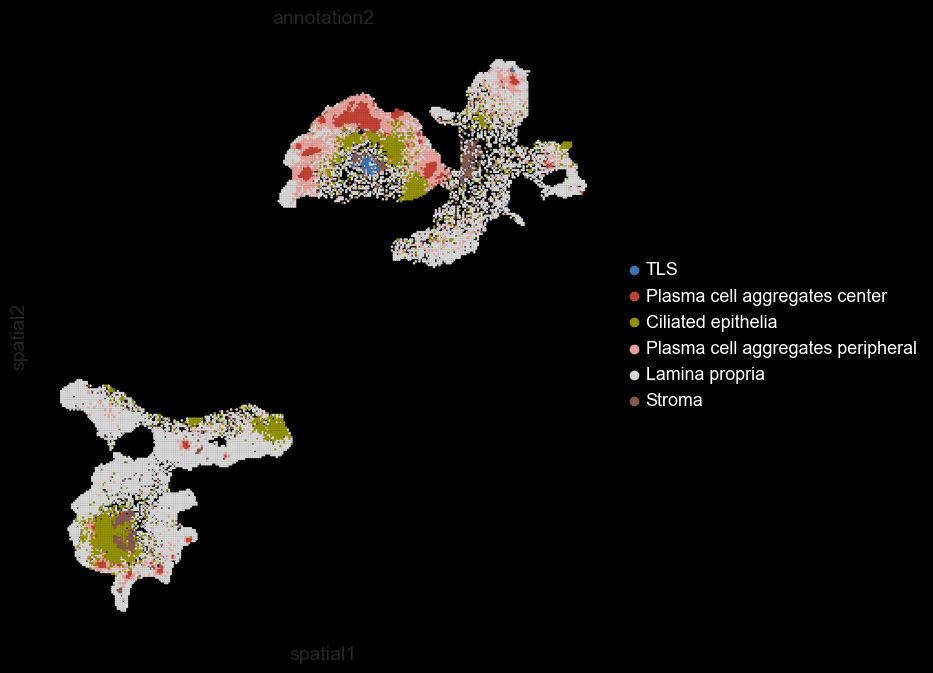

In [17]:
fig,ax = plt.subplots(figsize = (8,8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
sc.pl.spatial(rna,color = 'annotation2',spot_size = 70,show = False,ax = ax)
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_color("white")
# fig.savefig('./Main_figure/Fig4A.pdf',bbox_inches = 'tight')

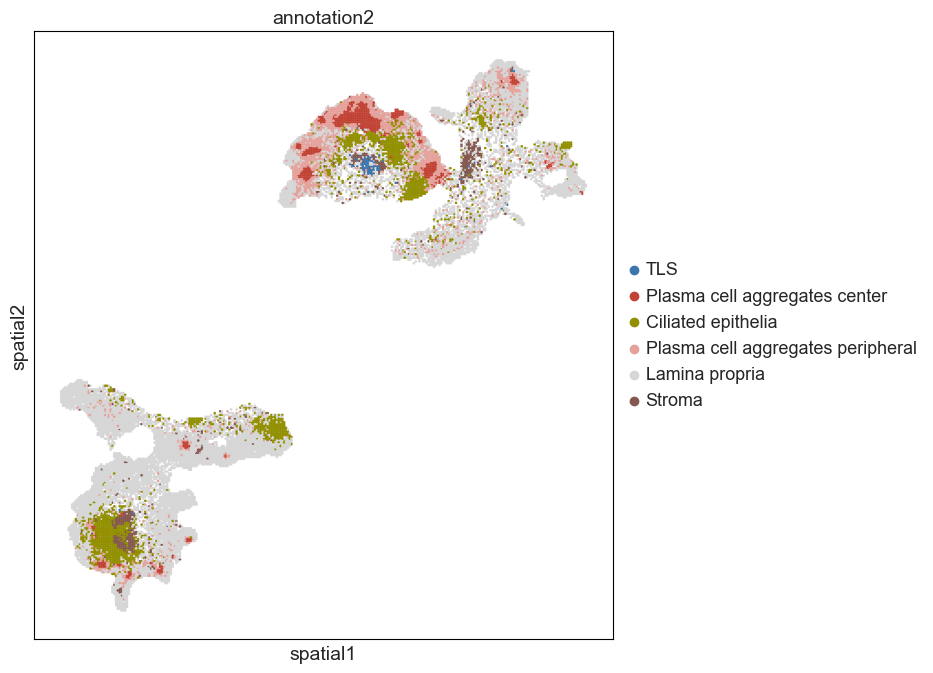

In [18]:
fig,ax = plt.subplots(figsize = (8,8))
sc.pl.spatial(rna,color = 'annotation2',spot_size = 70,show = False,ax = ax)
legend = ax.get_legend()
fig.savefig('./Main_figure/Fig4A.white.pdf',bbox_inches = 'tight')

In [29]:
rna.uns['label_colors'] = ['#C86536','#B499BA']

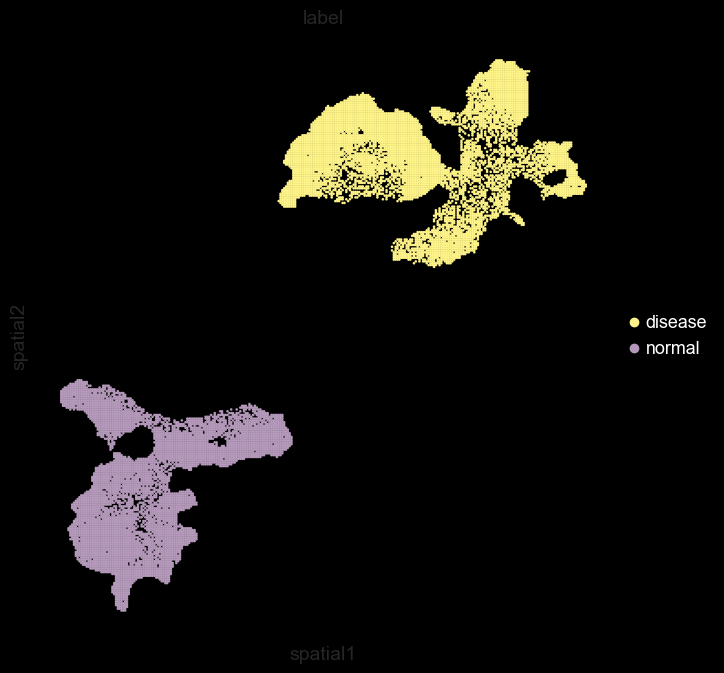

In [19]:
fig,ax = plt.subplots(figsize = (8,8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
sc.pl.spatial(rna,color = 'label',spot_size = 70,show = False,ax = ax)
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_color("white")
# fig.savefig('./Main_figure/Fig4B.pdf',bbox_inches = 'tight')

In [23]:
vector(True)

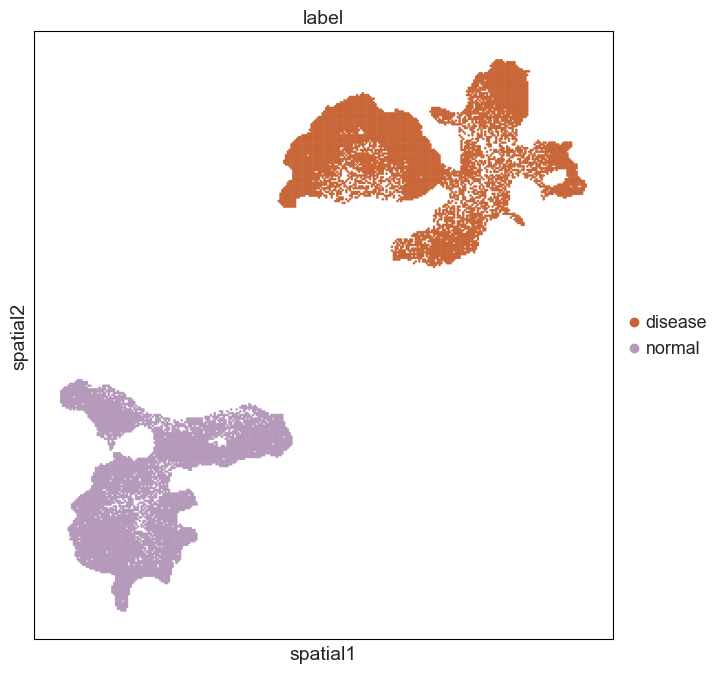

In [30]:
fig,ax = plt.subplots(figsize = (8,8))
sc.pl.spatial(rna,color = 'label',spot_size = 70,show = False,ax = ax)
fig.savefig('./Main_figure/Fig4B.white.C86536.dot.pdf',bbox_inches = 'tight')

# sup aggregate 占比

In [17]:
di_rna = rna[rna.obs['label']=='disease']
nor_rna = rna[rna.obs['label']=='normal']

In [18]:
data = []
for typ in ['disease','normal']:
    tmpadata = rna[rna.obs['label']==typ]
    vc = tmpadata.obs['annotation2'].value_counts()
    total = tmpadata.obs['annotation2'].value_counts().sum()
    tls_num = vc.loc['TLS']
    ac_num = vc.loc['Plasma cell aggregates center']
    iap_num = vc.loc['Plasma cell aggregates peripheral']
    rest = total - tls_num - ac_num -iap_num
    data.append([tls_num,ac_num,iap_num,rest])

In [19]:
data = pd.DataFrame(data,columns = ['TLS','Plasma cell aggregates center','Plasma cell aggregates peripheral','other'])
data.index = ['disease','normal']
data = data.div(data.sum(axis=1), axis=0)

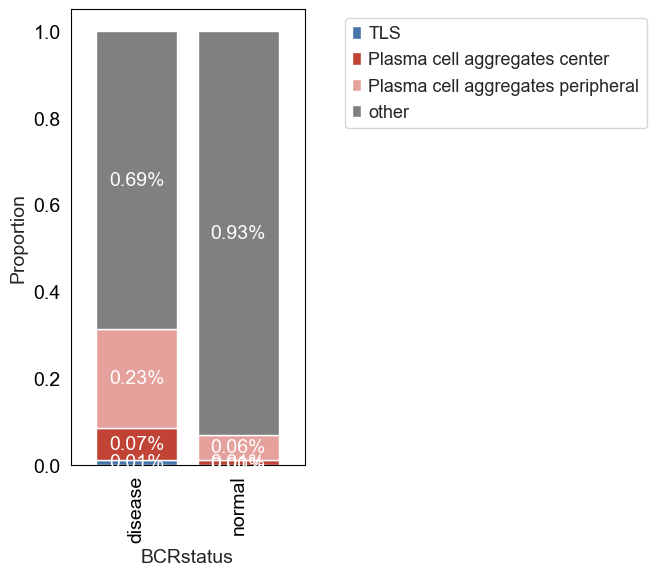

In [20]:
fig,ax = plt.subplots(figsize = (3,6))
data.plot(kind='bar', stacked=True, ax = ax, color = {'TLS':'#4A75AA','Plasma cell aggregates center':'#C14335','Plasma cell aggregates peripheral':'#E5A29C','other':'grey'},width = 0.8)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.2f%%', color='white')
plt.ylabel('Proportion')
plt.xlabel('BCRstatus')
plt.legend(loc='upper right',bbox_to_anchor = (2.5,1))
plt.grid(False)
# plt.savefig('./Sup7/Sup7D.pdf')

# sup8a

In [78]:
annodict = dict(zip(cellbin.obs_names,cellbin.obs['annotation2']))
binannodict = dict(zip(bin50.obs_names,bin50.obs['annotation2']))

In [616]:
tcrcells = set(list(cellbin.uns['XCR']['i2c']['TRA'].keys()) + list(cellbin.uns['XCR']['i2c']['TRB'].keys()))
bcrcells = set(list(cellbin.uns['XCR']['i2c']['IGH'].keys()) + list(cellbin.uns['XCR']['i2c']['IGL'].keys())  + list(cellbin.uns['XCR']['i2c']['IGK'].keys()))

In [617]:
tcrdf = pd.DataFrame(tcrcells,columns = ['cell'])
bcrdf = pd.DataFrame(bcrcells,columns = ['cell'])
tcrdf['anno'] = tcrdf['cell'].map(annodict)
bcrdf['anno'] = bcrdf['cell'].map(annodict)

In [618]:
vc = tcrdf['anno'].value_counts()

In [619]:
colordict = dict(zip(rna.obs['annotation2'].cat.categories,rna.uns['annotation2_colors']))

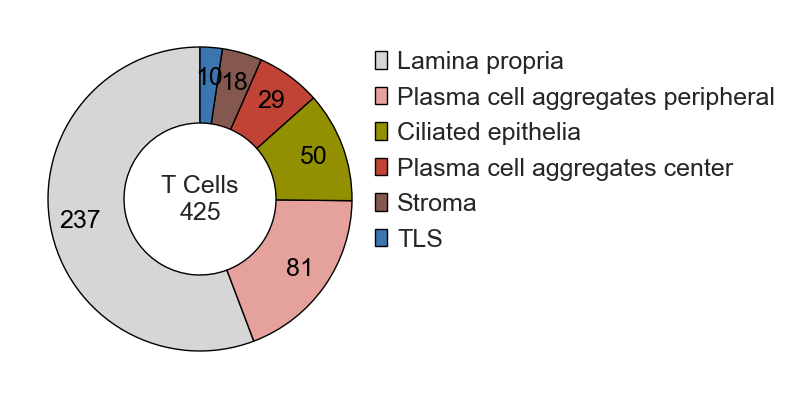

In [620]:
vc = tcrdf['anno'].value_counts()
fontsize = 18
chain = 'TCR'


def absolute_value(pct,total):
    return int(round(pct*total/100.0))

total = vc.sum()
fig,ax = plt.subplots(figsize = (5,5))
wedges= ax.pie(
    vc.values,
    startangle=90,
    radius=1,
    wedgeprops=dict(width = 0.5,edgecolor = 'black'),
    colors = [colordict[i] for i in vc.index],
    autopct=lambda p: f'{absolute_value(p,total)}',
    textprops={'fontsize': fontsize ,'color' : 'black'},
    pctdistance=0.8,
)
ax.text(0, 0, f"T Cells\n{total}", ha='center', va='center',fontsize = fontsize)
ax.legend(wedges[0], vc.index, loc='upper left', bbox_to_anchor=(0.9, 0.95), frameon=False,fontsize=fontsize)
fig.savefig('./Sup8/Sup8A_Tcells.pdf',bbox_inches = 'tight')

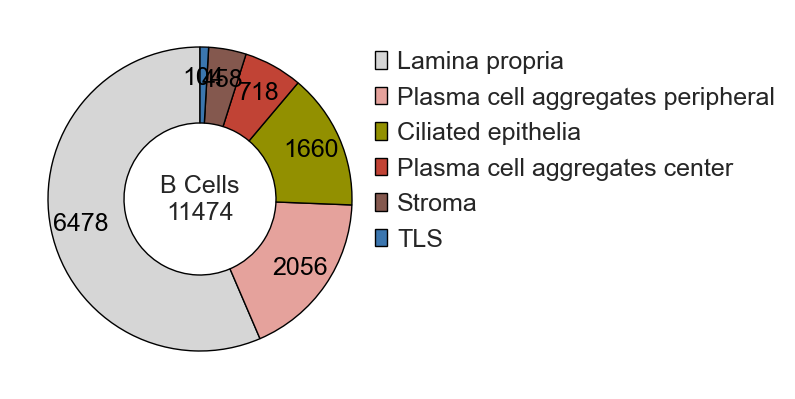

In [621]:
vc = bcrdf['anno'].value_counts()
fontsize = 18
chain = 'BCR'

def absolute_value(pct,total):
    return int(round(pct*total/100.0))

total = vc.sum()
fig,ax = plt.subplots(figsize = (5,5))
wedges= ax.pie(
    vc.values,
    startangle=90,
    radius=1,
    wedgeprops=dict(width = 0.5,edgecolor = 'black'),
    colors = [colordict[i] for i in vc.index],
    autopct=lambda p: f'{absolute_value(p,total)}',
    textprops={'fontsize': fontsize ,'color' : 'black'},
    pctdistance=0.8,
)
ax.text(0, 0, f"B Cells\n{total}", ha='center', va='center',fontsize = fontsize)
ax.legend(wedges[0], vc.index, loc='upper left', bbox_to_anchor=(0.9, 0.95), frameon=False,fontsize=fontsize)
fig.savefig('./Sup8/Sup8A_Bcells.pdf',bbox_inches = 'tight')

# sup

In [622]:
def custom_label(row):
    if row['annotation2'] == 'TLS':
        return 'TLS'
    elif row['label'] == 'normal':
        return 'other'
    elif row['label'] == 'disease':
        return 'disease'
    else:
        return 'other'
bin50.obs['result'] = bin50.obs.apply(custom_label, axis=1)

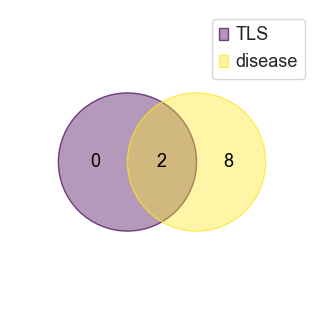

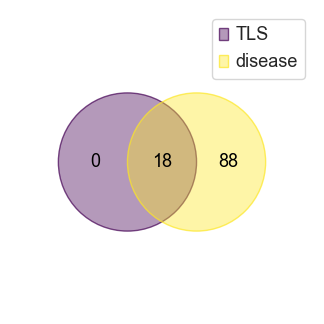

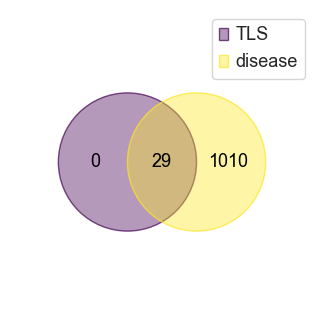

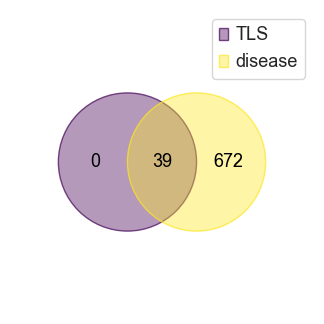

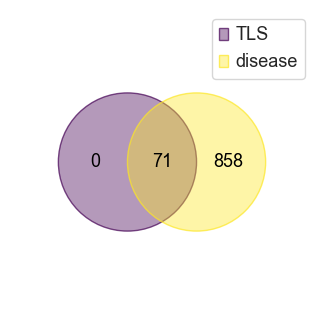

In [623]:
for chain in ['TRA','TRB','IGH','IGL','IGK']:
    spaxcr.pl.intersection(bin50,groups = ['TLS','disease'],groupby = 'result',chain = chain,figsize = (4,4),save = f'./Sup8/Sup8B.{chain}.tls_disease.venn.pdf')

In [624]:
def custom_label(row):
    if row['annotation2'] == 'TLS':
        return 'TLS'
    elif row['label'] == 'normal':
        return 'normal'
    elif row['label'] == 'disease':
        return 'disease'
    else:
        return row['label']

bin50.obs['result'] = bin50.obs.apply(custom_label, axis=1)

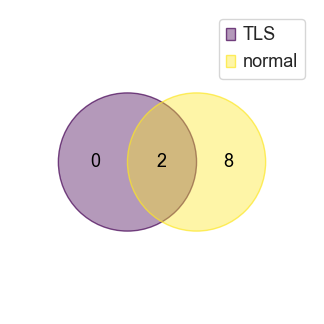

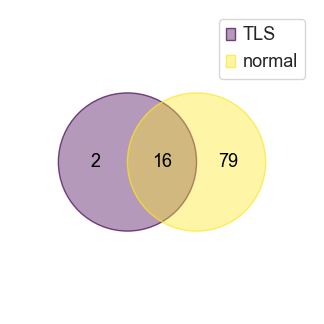

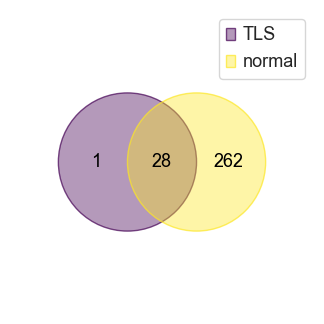

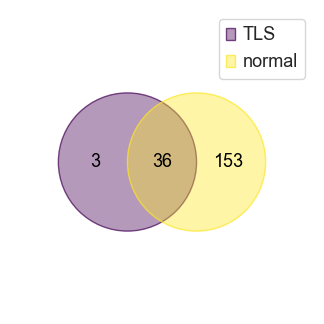

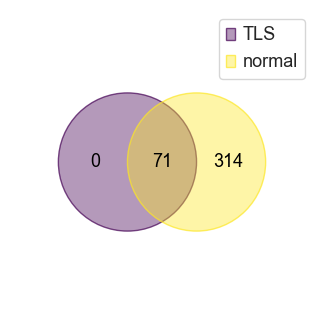

In [625]:
for chain in ['TRA','TRB','IGH','IGL','IGK']:
    spaxcr.pl.intersection(bin50,groups = ['TLS','normal'],groupby = 'result',chain = chain,figsize = (4,4),save = f'./Sup8/Sup8B.{chain}.tls_normal.venn.pdf')

# sup7 rna

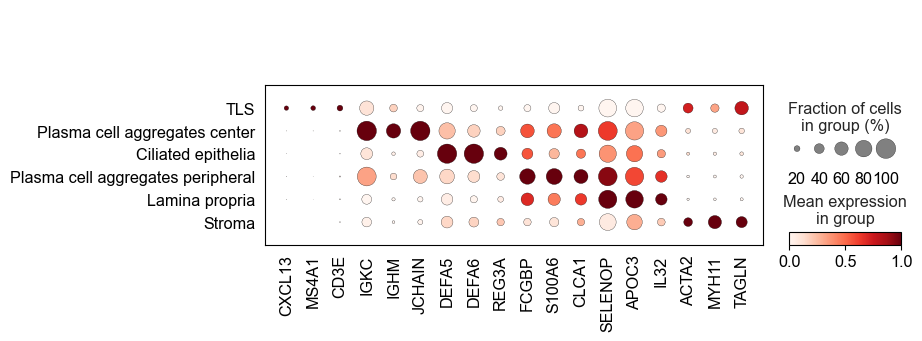

In [88]:
gene_list = ['CXCL13','MS4A1','CD3E',
             'IGKC','IGHM','JCHAIN',
             'DEFA5','DEFA6','REG3A',
             'FCGBP','S100A6','CLCA1',
             'SELENOP','APOC3','IL32',
             'ACTA2','MYH11','TAGLN',
            ]

sc.pl.dotplot(rna,gene_list,groupby = 'annotation2',standard_scale='var',save = 'sup7A.pdf')

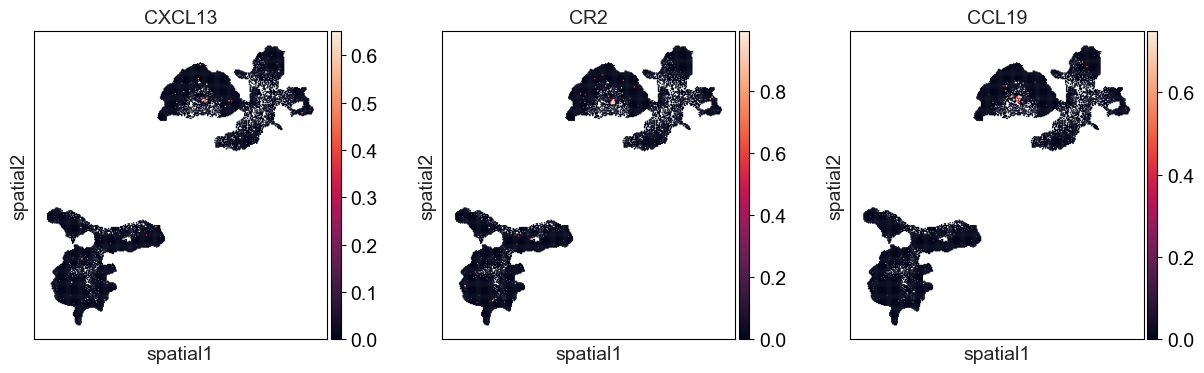

In [98]:
sc.pl.spatial(rna,color = ['CXCL13','CR2','CCL19'],spot_size = 80,vmax = 'p99.9',save='sup7B.pdf')

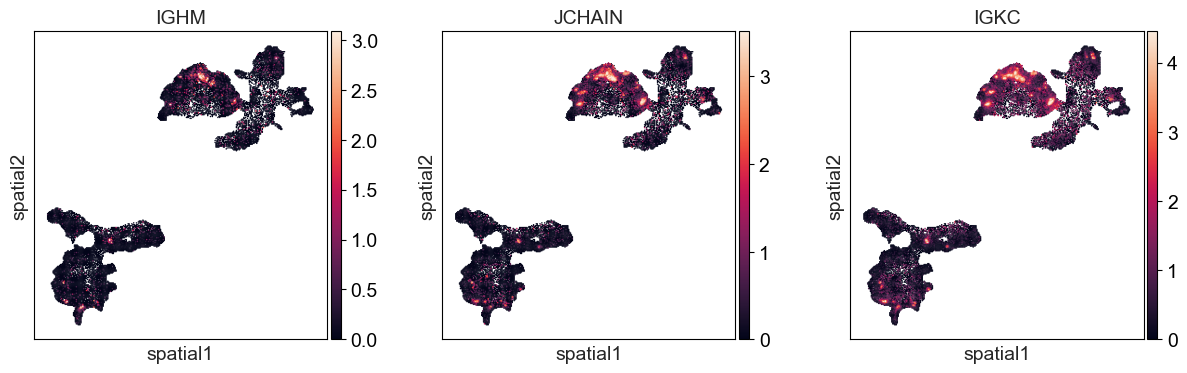

In [99]:
sc.pl.spatial(rna,color = ['IGHM','JCHAIN','IGKC'],spot_size = 80,vmax = 'p99.9',save='sup7C.pdf')

# figure 4d

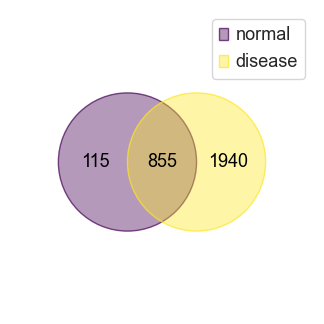

In [25]:
spaxcr.pl.intersection(bin50,groups = ['normal','disease'],groupby = 'label',chain = 'total',figsize = (4,4))#save='./Main_figure/Fig4d.pdf')

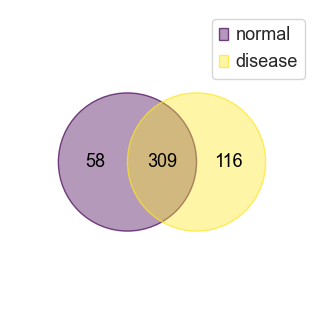

In [627]:
spaxcr.pl.intersection(cellbin,groups = ['normal','disease'],groupby = 'label',chain = 'total',figsize = (4,4),save='./Main_figure/Fig4d.cellbin.pdf')

In [70]:
uniquecdr3 = spaxcr.tl.intersection(cellbin,groups = ['normal','disease'],groupby = 'label',chain = 'total',mode = 'total')
disease_unqiue = uniquecdr3[uniquecdr3['Occurance'] != 'normal'].copy()
disease_unqiue['type'] =disease_unqiue['CDR3'].map(lambda x: x.split('@')[1])

In [71]:
disease_cdr3_cells = []
for i in disease_unqiue['CDR3']:
    disease_cdr3_cells.extend(query(cellbin,i))
disease_cdr3_cells = list(set(disease_cdr3_cells))

In [79]:
disease_cdr3_cells = pd.DataFrame(disease_cdr3_cells,columns = ['cell'])
disease_cdr3_cells['anno'] = disease_cdr3_cells['cell'].map(annodict)

In [80]:
disease_unqiue['appear'] = disease_unqiue['CDR3'].map(lambda x : list(set([annodict[cell] for cell in query(cellbin,x)])))

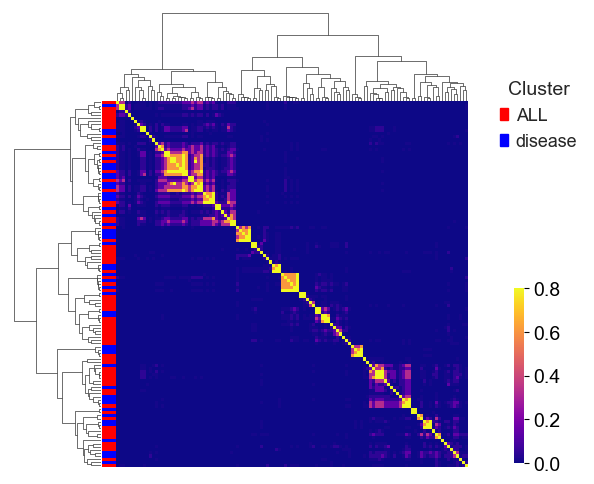

In [632]:
sub_disease_unqiue = disease_unqiue[disease_unqiue['type']=='IGL']
spaxcr.pl.similarity(cdr3s = sub_disease_unqiue['CDR3'], labels = sub_disease_unqiue['Occurance'] ,linkage_method = 'ward',method = 'gaussian',cdr3_palette = {'ALL':'red','disease':'blue'},vmax = 0.8,save = './Main_figure/IGL.hm_with_venn.pdf')

In [637]:
sub_disease_unqiue['mu'] = sub_disease_unqiue['CDR3'].map(mutationdict)

/tmp/ipykernel_155608/4089699730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_disease_unqiue['mu'] = sub_disease_unqiue['CDR3'].map(mutationdict)


In [638]:
sub_disease_unqiue

CDR3 Occurance type  \
0     CSSYTSSDTLVF@IGL       ALL  IGL   
6     CVLCLSNDIWVF@IGL       ALL  IGL   
14     CMLHYGPTWVF@IGL       ALL  IGL   
21     CSLGYGGRPVF@IGL       ALL  IGL   
24   CAAWDDSLNAWVF@IGL       ALL  IGL   
..                 ...       ...  ...   
472   CVLHFLSGISMF@IGL   disease  IGL   
477    CLPAQSGVWVF@IGL   disease  IGL   
478  CYTYAGHNKPPLL@IGL   disease  IGL   
480  CSAWDDSLNSPVF@IGL   disease  IGL   
482  CSAWDSSPSAWVF@IGL   disease  IGL   

                                                appear        mu  
0    [Plasma cell aggregates peripheral, Lamina pro...  germline  
6    [Plasma cell aggregates peripheral, Lamina pro...  germline  
14   [Plasma cell aggregates peripheral, Lamina pro...  germline  
21   [Plasma cell aggregates peripheral, Lamina pro...  germline  
24   [Plasma cell aggregates peripheral, Lamina pro...  germline  
..                                                 ...       ...  
472                               [Ciliated epithelia]   mutated  
477                [Plasma cell aggregates peripheral]  germline  
478                                   [Lamina propria]   mutated  
480               [Lamina propria, Ciliated epithelia]   mutated  
482                                   [Lamina propria]   mutated  

[117 rows x 5 columns]

In [640]:
import spaxcr_new

In [641]:
sub_disease_unqiue

CDR3 Occurance type  \
0     CSSYTSSDTLVF@IGL       ALL  IGL   
6     CVLCLSNDIWVF@IGL       ALL  IGL   
14     CMLHYGPTWVF@IGL       ALL  IGL   
21     CSLGYGGRPVF@IGL       ALL  IGL   
24   CAAWDDSLNAWVF@IGL       ALL  IGL   
..                 ...       ...  ...   
472   CVLHFLSGISMF@IGL   disease  IGL   
477    CLPAQSGVWVF@IGL   disease  IGL   
478  CYTYAGHNKPPLL@IGL   disease  IGL   
480  CSAWDDSLNSPVF@IGL   disease  IGL   
482  CSAWDSSPSAWVF@IGL   disease  IGL   

                                                appear        mu  
0    [Plasma cell aggregates peripheral, Lamina pro...  germline  
6    [Plasma cell aggregates peripheral, Lamina pro...  germline  
14   [Plasma cell aggregates peripheral, Lamina pro...  germline  
21   [Plasma cell aggregates peripheral, Lamina pro...  germline  
24   [Plasma cell aggregates peripheral, Lamina pro...  germline  
..                                                 ...       ...  
472                               [Ciliated epithelia]   mutated  
477                [Plasma cell aggregates peripheral]  germline  
478                                   [Lamina propria]   mutated  
480               [Lamina propria, Ciliated epithelia]   mutated  
482                                   [Lamina propria]   mutated  

[117 rows x 5 columns]

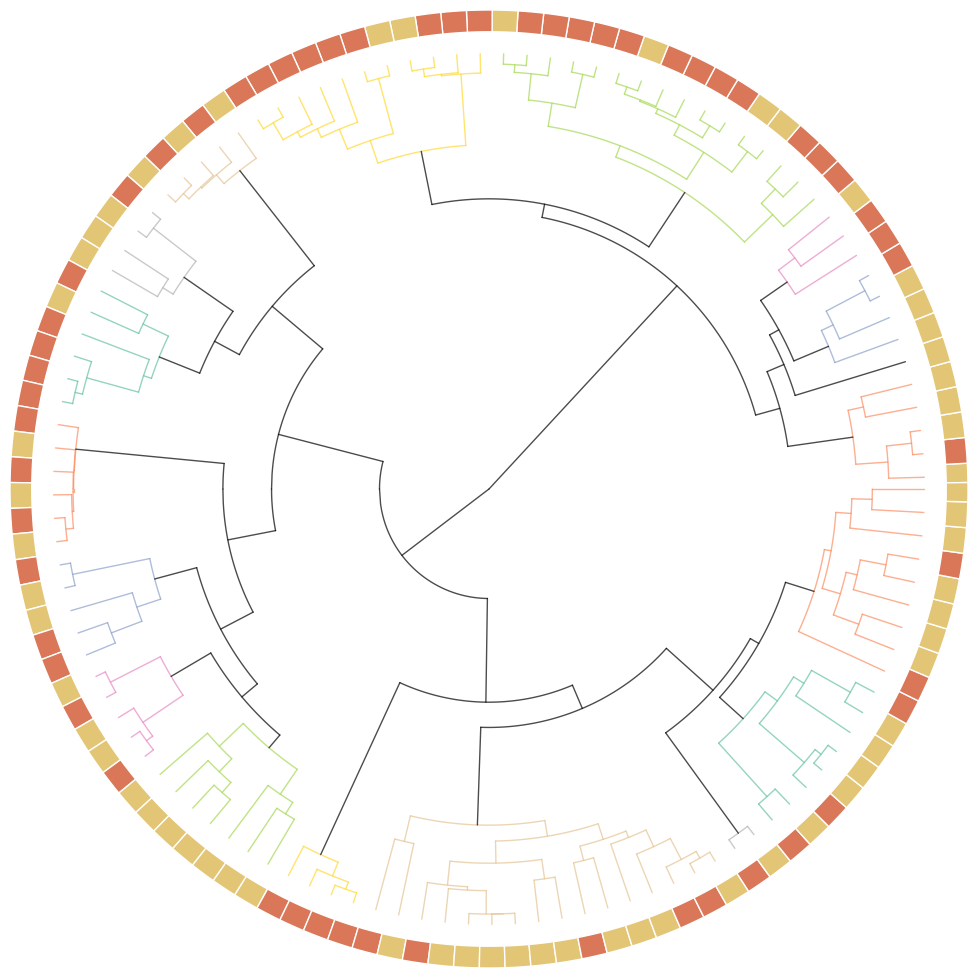

In [683]:
family_df = spaxcr_new.pl.similarity_radialtree(sub_disease_unqiue,linkage_method = 'ward',threshold = 10,metas = ['mu'],color_dicts = [{'germline':'#E3C576','mutated':'#D97758'}],linewidth = 1,pallete = 'Set2' ,return_df = True,insert_cost = 1,replace_cost = 1)

In [697]:
from matplotlib.colors import to_hex

In [698]:
p = dict(zip( sorted(family_df['cluster'].unique()) , [to_hex(i) for i in plt.get_cmap('tab20')(range(len(family_df['cluster'].unique())))]  ))

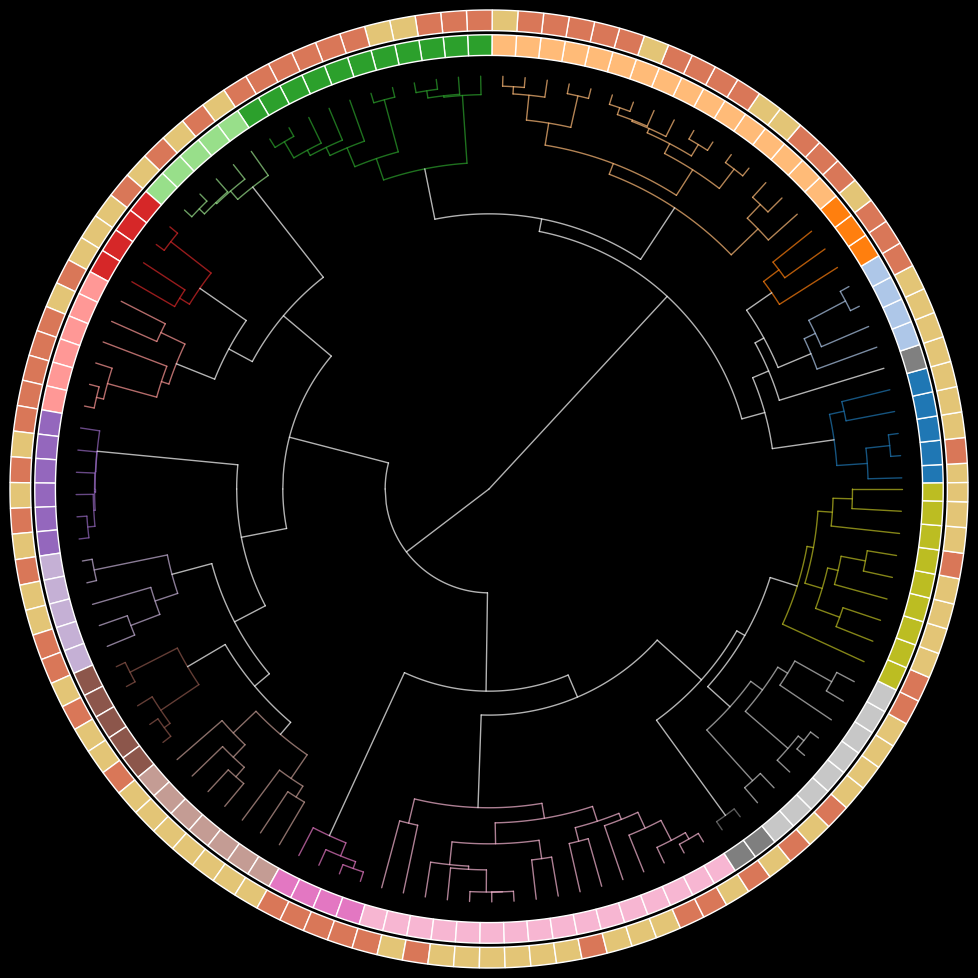

In [699]:
fig,ax = plt.subplots(figsize = (10,10))
spaxcr_new.pl.similarity_radialtree(family_df,linkage_method = 'ward',threshold = 10,metas = ['mu','cluster'],color_dicts = [{'germline':'#E3C576','mutated':'#D97758'},p],linewidth = 1,pallete = p ,return_df = True,linecolor='white',insert_cost = 1,replace_cost = 1,ax = ax)
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.savefig('./Main_figure/Fig4F.IGL117.family18.circle.pdf')

In [670]:
family_df['cluster'].value_counts().shape

(18,)

Found cluster : 19


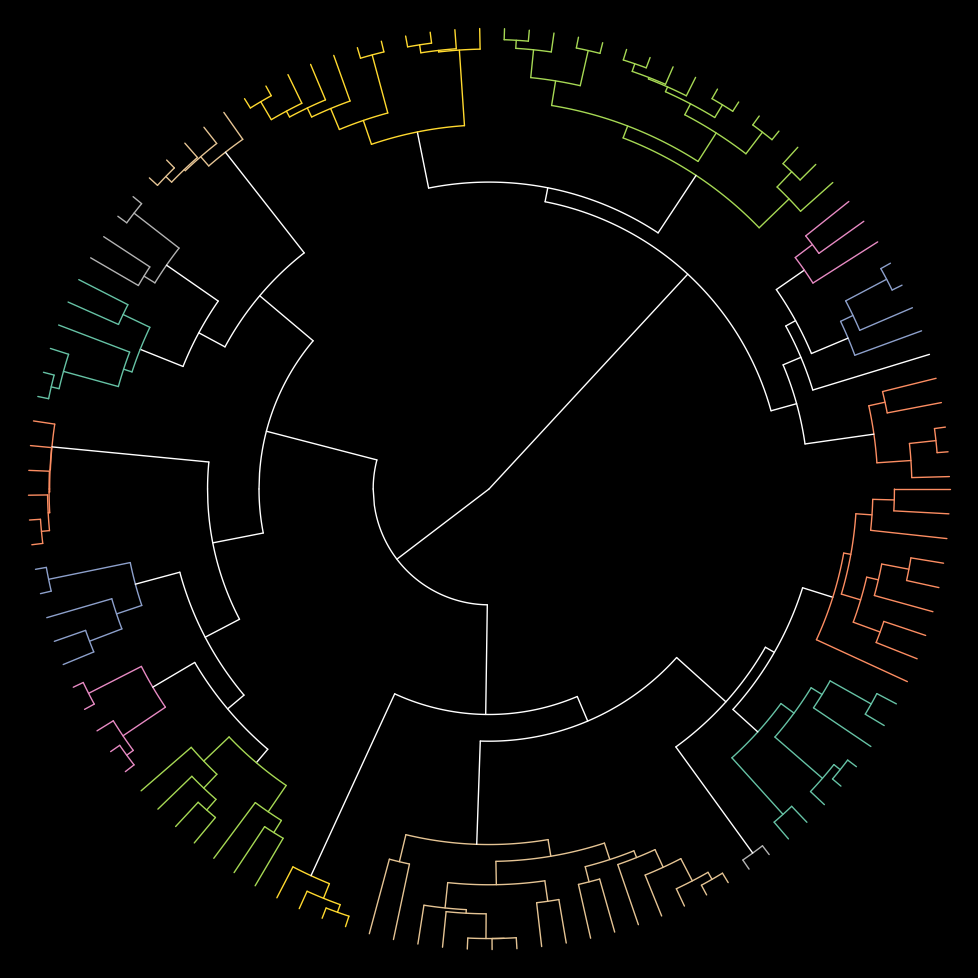

In [635]:
fig,ax = spaxcr.pl.CDR3cluster(sub_disease_unqiue['CDR3'].tolist(),metas = ['mu'],color_dicts = [{'germline':'#E3C576','mutated':'#D97758'}],linkage_method='ward',threshold = 10,linecolor='white',pallete = 'Set2',linewidth =1,alpha = 1,show = True)

ax.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.savefig('./Main_figure/Fig4F.IGL117.family19.circle.pdf')

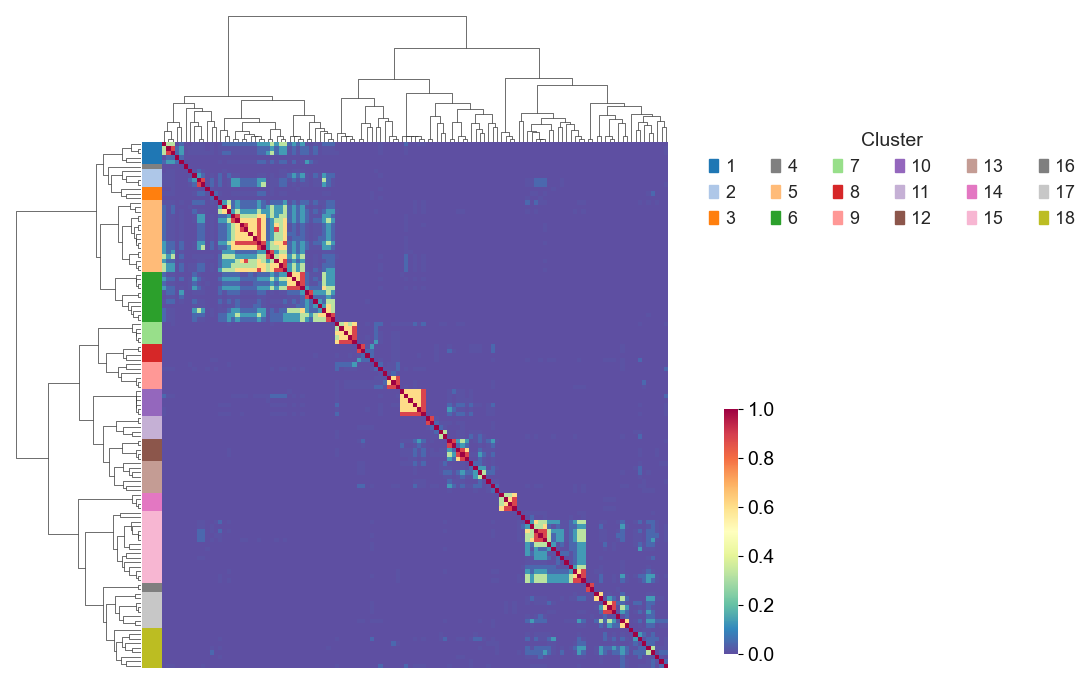

In [705]:
g = spaxcr_new.pl.similarity_heatmap(family_df,label = 'cluster',label_colors = p,figsize=(7,7),label_show = True,linkage_method='ward',threshold = 10,return_g = True)
g.savefig('./Main_figure/Fig4F.IGL117.family18.hm.pdf')

In [377]:
clusterdf = spaxcr.tl.CDR3cluster(sub_disease_unqiue['CDR3'].tolist(),linkage_method='ward',threshold = 10)

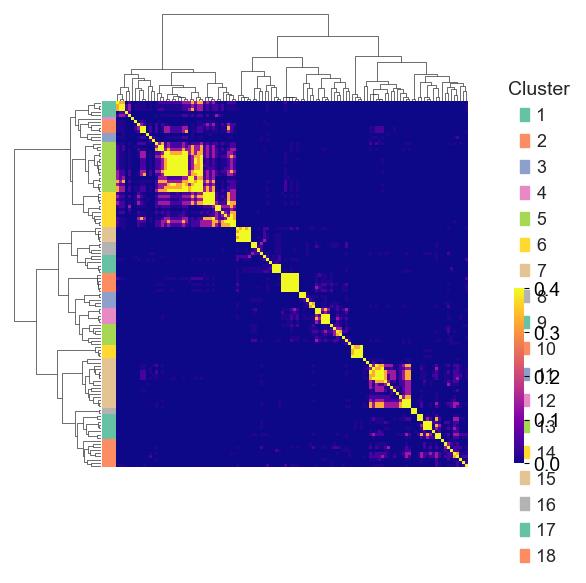

In [378]:
spaxcr.pl.similarity(cdr3s = clusterdf['CDR3'], labels = clusterdf['cluster'] ,linkage_method = 'ward',method = 'gaussian',vmax = 0.4)#save = 'g_h.hm.pdf')

In [81]:
mutationdict = dict(zip(cellbin.var_names,cellbin.var['BCRstatus']))
# sub_disease_unqiue = disease_unqiue[disease_unqiue['type'].isin(['IGL','IGK','IGH'])]
sub_disease_unqiue =  disease_unqiue[disease_unqiue['type'].isin(['IGL'])]
sub_disease_unqiue['mu'] = sub_disease_unqiue['CDR3'].map(mutationdict)

/tmp/ipykernel_1078237/2648254489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_disease_unqiue['mu'] = sub_disease_unqiue['CDR3'].map(mutationdict)


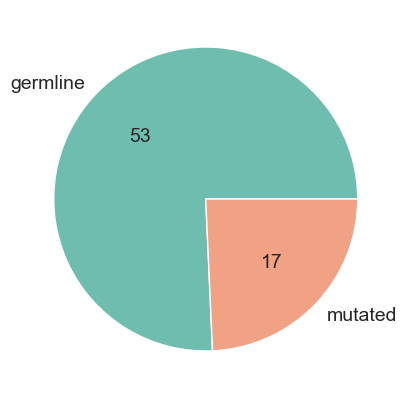

In [83]:
def absolute_value(pct,total):
    return int(round(pct*total/100.0))

vc = sub_disease_unqiue[sub_disease_unqiue['Occurance'] == 'ALL']['mu'].value_counts()
vc = vc.loc[['germline','mutated']]
total = vc.sum()
fig,ax = plt.subplots(figsize = (5,5))
ax.pie(vc,labels = vc.index,autopct=lambda p: f'{absolute_value(p,total)}',colors= ['#6FBDAF','#F1A184'])
fig.savefig('./Main_figure/fig4g.igl.frombystander309.mutationdict.pdf')

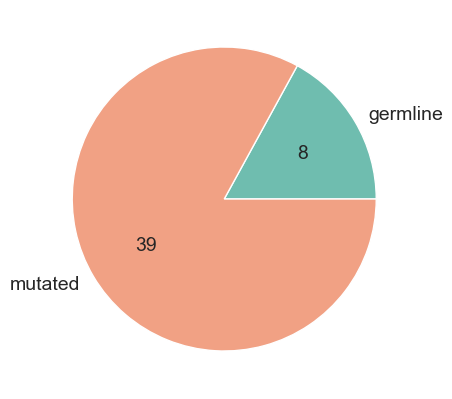

In [743]:
vc = sub_disease_unqiue[sub_disease_unqiue['Occurance'] == 'disease']['mu'].value_counts()
vc = vc.loc[['germline','mutated']]
total = vc.sum()
fig,ax = plt.subplots(figsize = (5,5))
ax.pie(vc,labels = vc.index,autopct=lambda p: f'{absolute_value(p,total)}',colors= ['#6FBDAF','#F1A184'])
fig.savefig('./Main_figure/fig4g.igl.from_disease_106.mutationdict.pdf')

In [713]:
total_cdr3_df = []
for chain in ['IGH','IGL','IGK','TRA','TRB']:
    topdf = spaxcr.tl.clonestat(cellbin[cellbin.obs['label'] == 'disease'],chain)
    total_cdr3_df.append(topdf)
total_cdr3_df = pd.concat(total_cdr3_df)
total_cdr3_df=  total_cdr3_df.sort_values('n_cells',ascending=False,ignore_index=True)

In [714]:
total_cdr3_df

CDR3  n_cells
0         CMIWHSGAWVF@IGL      541
1       CARDRFCVTFDIW@IGH      367
2         CQCSGYPIDYW@IGH      331
3        CSSYTTSNTVVF@IGL      219
4       CFSYAGHNKPPLL@IGL      179
..                    ...      ...
420     CARDKGVVTMDYW@IGH        1
421   CARIGVFTERCLDYW@IGH        1
422  CAWCLWAGAISSPDYR@IGH        1
423       CARANPALDFW@IGH        1
424   CAMAEIYNQGGKLIF@TRA        1

[425 rows x 2 columns]

In [16]:
mutationdict = dict(zip(cellbin.var_names,cellbin.var['BCRstatus']))

total_cdr3 = spaxcr.tl.intersection(cellbin,groups = ['normal','disease'],groupby = 'label',chain = 'IGL',mode = 'total')
total_cdr3['m'] = total_cdr3['CDR3'].map(mutationdict)
total_cdr3 = total_cdr3.dropna()
disease_mutation_cdr3 = total_cdr3[(total_cdr3['Occurance'] == 'disease') & (total_cdr3['m'] == 'mutated')]

germline_normal_cdr3 = total_cdr3[(total_cdr3['Occurance'] == 'normal') & (total_cdr3['m'] == 'germline')]

germline_bystander_cdr3 = total_cdr3[(total_cdr3['Occurance'] == 'ALL') & (total_cdr3['m'] == 'germline')]

germline_disease_cdr3 = total_cdr3[(total_cdr3['Occurance'] == 'disease') & (total_cdr3['m'] == 'germline')]

germline_cdr3 =  total_cdr3[(total_cdr3['m'] == 'germline')]

In [17]:
germline_disease_cdr3.shape

(8, 3)

In [18]:
germline_bystander_cdr3.shape

(53, 3)

In [19]:
allgermline_cdr3 = germline_bystander_cdr3['CDR3'].tolist() + germline_disease_cdr3['CDR3'].tolist()

In [20]:
cdr3dict = dict(zip(germline_cdr3['CDR3'],germline_cdr3['Occurance']))

In [21]:
from Levenshtein import distance

In [22]:
result = []
m=0
from_germline = []
for cdr3 in disease_mutation_cdr3['CDR3']:
    lw_distance = [distance(cdr3,i) for i in allgermline_cdr3]
    min_distance = np.min(lw_distance)
    min_idx = [idx for idx,lw_d in enumerate(lw_distance) if lw_d == min_distance]
    close_cdr3s = [allgermline_cdr3[idx] for idx in min_idx]
    close_cdr3s_type = list(set([cdr3dict[cdr3] for cdr3 in close_cdr3s]))
    
    if min_distance >=5:
        result.append([cdr3,'distance_undefine'])
    else:
        if len(close_cdr3s_type) == 1:
            result.append([cdr3,close_cdr3s_type[0]])
            from_germline.append([cdr3,close_cdr3s])
        else:
            m+=1
            result.append([cdr3,'type_undefine'])

In [23]:
from_germline = pd.DataFrame(from_germline)

In [24]:
result = pd.DataFrame(result,columns = ['cdr3','type'])

In [25]:
result.loc[result['type']=='ALL','type'] = 'bystander'

/home/liuyi/miniconda3/envs/spatial/lib/python3.9/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/home/liuyi/miniconda3/envs/spatial/lib/python3.9/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


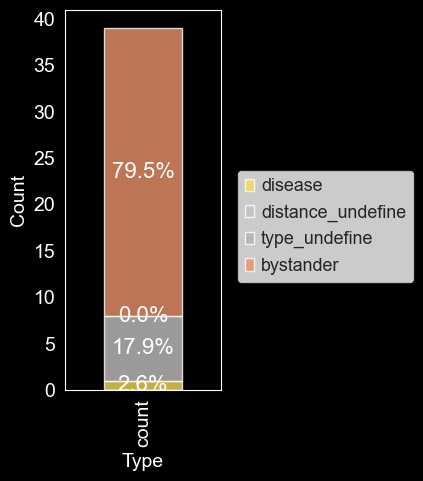

In [26]:
type_counts = result['type'].value_counts()
type_counts = type_counts.reindex(['disease', 'distance_undefine', 'type_undefine', 'bystander'])
type_counts = type_counts.fillna(0)
df = pd.DataFrame(type_counts).T
fig,ax = plt.subplots(figsize = (2,5))
df.plot(kind='bar', stacked=True,ax = ax, color=['#F9DA56', '#C4C1C1', '#B3B3B3', '#ED936B'],alpha = 0.8)
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

totals = df.sum(axis=1)  # 总数
for i, col in enumerate(df.columns):
    cumulative_sum = df.iloc[0, :i+1].sum()
    percentage = df[col] / totals * 100
    ax.text(0, cumulative_sum - df[col] / 2, f'{percentage.values[0]:.1f}%', 
            ha='center', va='center', color='white', fontsize=16)
    
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(bbox_to_anchor = (1.05,0.6))
plt.grid(False)
fig.patch.set_facecolor('black')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')

plt.savefig('./Main_figure/Fig4L.vote.pdf',bbox_inches = 'tight')
plt.show()

In [27]:
fromtypedict = dict(zip(result['cdr3'],result['type']))

In [28]:
from_germline.columns = ['cdr3','fromgermline']
from_germline['type'] = from_germline['cdr3'].map(fromtypedict)
from_germline = from_germline[from_germline['type'] == 'bystander']

In [29]:
stat_list = []
for i in from_germline['fromgermline']:
    stat_list.extend(i)
    
from collections import Counter
stat = dict(Counter(stat_list))

In [30]:
total_cdr3_df = []
for chain in ['IGL']:
    topdf = spaxcr.tl.clonestat(cellbin[cellbin.obs['label'] == 'disease'],chain)
    total_cdr3_df.append(topdf)
total_cdr3_df = pd.concat(total_cdr3_df)
total_cdr3_df=  total_cdr3_df.sort_values('n_cells',ascending=False,ignore_index=True)

In [31]:
stat = pd.DataFrame({'cdr3':stat.keys(),'count':stat.values()})
total_cdr3_df['rank'] = total_cdr3_df.index
stat['rank'] = stat['cdr3'].map(dict(zip(total_cdr3_df['CDR3'],total_cdr3_df['rank'])))

In [32]:
stat.shape

(19, 3)

In [33]:
from_germline = from_germline[from_germline['type'] == 'bystander']

In [34]:
total_cdr3_df['instat'] = total_cdr3_df['CDR3'].isin(stat['cdr3'])

In [35]:
total_cdr3_df['count'] = total_cdr3_df['CDR3'].map(dict(zip(stat['cdr3'],stat['count'])))

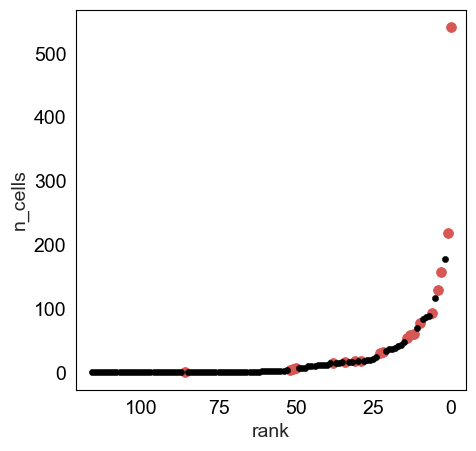

In [45]:
fig,ax = plt.subplots(figsize = (5,5))
sns.scatterplot(data = total_cdr3_df[total_cdr3_df['instat']],x = 'rank',y = 'n_cells',color = '#D75755',s = 50,edgecolor = None,ax = ax)
sns.scatterplot(data = total_cdr3_df[~total_cdr3_df['instat']],x = 'rank',y = 'n_cells',color = 'black',edgecolor = None,s = 20,ax = ax)
ax.grid(False)
ax.set_xlim(-5,total_cdr3_df['rank'].max()+5)
ax.invert_xaxis()
fig.savefig('./Sup8/sup9.disease_region_total_igl_expansion_rank.31mutead对应来源19germline_ranks.scatter.pdf')

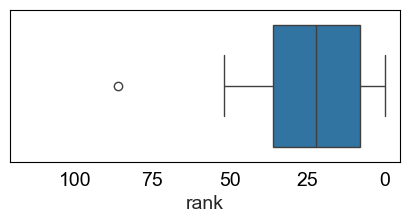

In [46]:
fig,ax = plt.subplots(figsize = (5,2))
sns.boxplot(data = total_cdr3_df[total_cdr3_df['instat']], x = 'rank',ax = ax)
ax.grid(False)
ax.set_xlim(-5,total_cdr3_df['rank'].max()+5)
ax.invert_xaxis()
fig.savefig('./Sup8/sup9.disease_region_total_igl_expansion_rank.31mutead对应来源19germline_ranks.Q25_8_Q75_36_M_22.box.pdf')

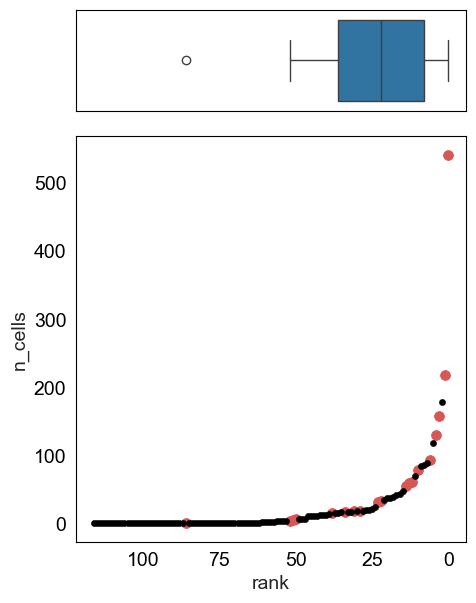

In [51]:
fig, (ax2, ax1) = plt.subplots(
    nrows=2,
    figsize=(5, 7),  # 总图大小
    gridspec_kw={'height_ratios': [1, 4]},  # 设置高度比例
    sharex=True  # 共享 x 轴
)

sns.scatterplot(
    data=total_cdr3_df[total_cdr3_df['instat']],
    x='rank',
    y='n_cells',
    color='#D75755',
    s=50,
    edgecolor=None,
    ax=ax1
)
sns.scatterplot(
    data=total_cdr3_df[~total_cdr3_df['instat']],
    x='rank',
    y='n_cells',
    color='black',
    edgecolor=None,
    s=20,
    ax=ax1
)
ax1.grid(False)
# ax1.set_xlim(-5, total_cdr3_df['rank'].max() + 5)
# ax1.invert_xaxis()
# ax1.set_ylabel("N Cells")
# ax1.set_title("Scatterplot")

sns.boxplot(
    data=total_cdr3_df[total_cdr3_df['instat']],
    x='rank',
    ax=ax2
)
ax2.grid(False)
# ax2.set_xlim(-5, total_cdr3_df['rank'].max() + 5)
# ax2.invert_xaxis()
# ax2.set_ylabel("Rank")
# ax2.set_xlabel("")
ax2.invert_xaxis()
plt.subplots_adjust(hspace=0.1)  # 调整上下图间距
plt.savefig('./Sup8/sup9.disease_region_total_igl_expansion_rank.31mutead对应来源19germline_ranks.Q25_8_Q75_36_M_22.box.pdf')

In [36]:
vc = total_cdr3_df[total_cdr3_df['instat']]['rank']
vc_array = np.array(vc)
vc_median = np.median(vc_array)
vc_q25 = np.quantile(vc_array, 0.25)
vc_q75 = np.quantile(vc_array, 0.75)
print(f"Median: {vc_median}")
print(f"Q25: {vc_q25}")
print(f"Q75: {vc_q75}")

In [37]:
vc_array = np.array(vc)
vc_median = np.median(vc_array)
vc_q25 = np.quantile(vc_array, 0.25)
vc_q75 = np.quantile(vc_array, 0.75)
print(f"Median: {vc_median}")
print(f"Q25: {vc_q25}")
print(f"Q75: {vc_q75}")

Median: 22.0
Q25: 8.0
Q75: 36.0


In [755]:
from_germline['germline'] = from_germline['fromgermline'].map(lambda x  : x[0])

In [756]:
total_cdr3_plot = pd.concat([from_germline['germline'],from_germline['cdr3']])
total_cdr3_plot = total_cdr3_plot.drop_duplicates().to_frame()

In [757]:
total_cdr3_plot['germline'] = total_cdr3_plot[0].isin(from_germline['germline'])

In [758]:
colors = pd.read_csv('/storage/liuyi/09.ma_tcr/color/colors_50.csv')
colors = colors[::2]

In [759]:
germline2mutation = from_germline.groupby('germline')['cdr3'].agg(list).reset_index()
germline2mutation['color'] = colors['x'].tolist()[:germline2mutation.shape[0]]

In [760]:
germline2mutation

germline                                               cdr3  \
0    CAAWDDSLNAWVF@IGL  [CAAWDDSLDAWVF@IGL, CAAWDDRLNAWVF@IGL, YAAWDDS...   
1    CASWDSSLTGLVF@IGL                                [CTSWDSSLTGLVF@IGL]   
2    CCSYAGSNTFVEF@IGL                                [CCLYAGSNTFMEF@IGL]   
3   CGTWDDSLNGPWVF@IGL            [CGTWDDSLNGPWVS@IGL, CSGWDDDLNGPVF@IGL]   
4    CGTWDTSLSAGVF@IGL                                [CGTWDISLSAGVF@IGL]   
5      CILSYNDYRVF@IGL                                  [CILSYNDYQVF@IGL]   
6      CLLSQSGARVF@IGL                                  [YLLSQSGARVF@IGL]   
7      CMIWHSGAWVF@IGL  [CMIWHSGARVF@IGL, YMIWHSGAWVF@IGL, CMIWHSGAWVC...   
8      CQTWGTGSVIF@IGL                 [YQTWGTGSVIF@IGL, CQTWGTDSVIF@IGL]   
9    CSAWDSSLRGWVF@IGL                                [CSSWDPSLGTWVF@IGL]   
10   CSAWDSSLSAWVF@IGL  [CPAWDSSLSAWVF@IGL, CLAWDTSLSAWVC@IGL, CSAWDSS...   
11   CSAWDSSLSGWVF@IGL  [CSAWDSNLSGWVF@IGL, CSAWDSSHSGWVF@IGL, SSAWDSS...   
12   CSSFRGSDKVRIF@IGL                                [CSPFRGSDKVRIF@IGL]   
13    CSSYAGNYIVLF@IGL                                 [CSSYAGNYILLF@IGL]   
14    CSSYTSSDTLVF@IGL                                 [CSSHTTSETLIF@IGL]   
15    CSSYTSSGTLVF@IGL                                 [CSSYETSGTLVF@IGL]   
16    CSSYTTSNTVVF@IGL                [CSSYTTSNTVF@IGL, CSLYTTSNTVVF@IGL]   
17    CVLHFLSGISVF@IGL                                 [CVLHFLSGISMF@IGL]   

      color  
0   #A6CEE3  
1   #69A7CD  
2   #2C80B8  
3   #519BA5  
4   #93C992  
5   #92CF72  
6   #59B348  
7   #4F9F3B  
8   #A99C6C  
9   #FA9493  
10  #EF5B5B  
11  #E42123  
12  #ED593C  
13  #F8A461  
14  #FDAC4F  
15  #FE8F1D  
16  #F58827  
17  #DD9F87

/tmp/ipykernel_155608/2764758482.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background['value'] = rna.obs['annotation2']
/tmp/ipykernel_155608/2764758482.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background['value'] = rna.obs['annotation2']
/tmp/ipykernel_155608/2764758482.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

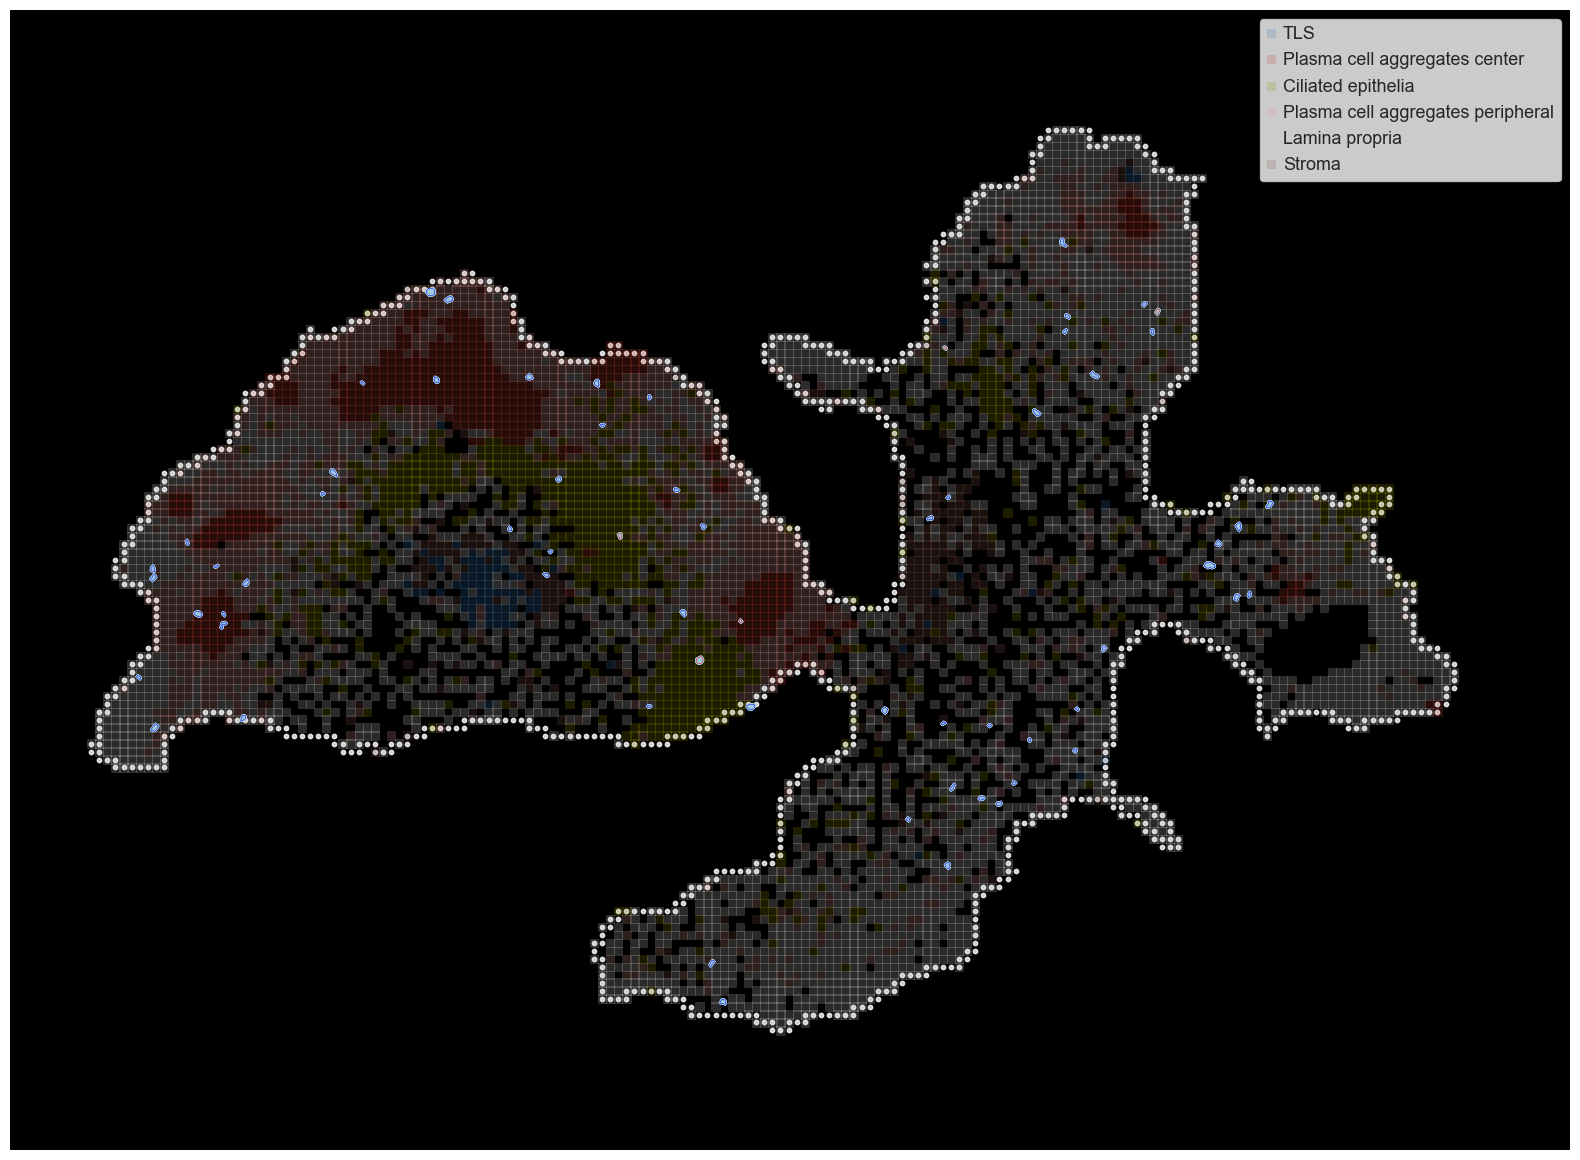

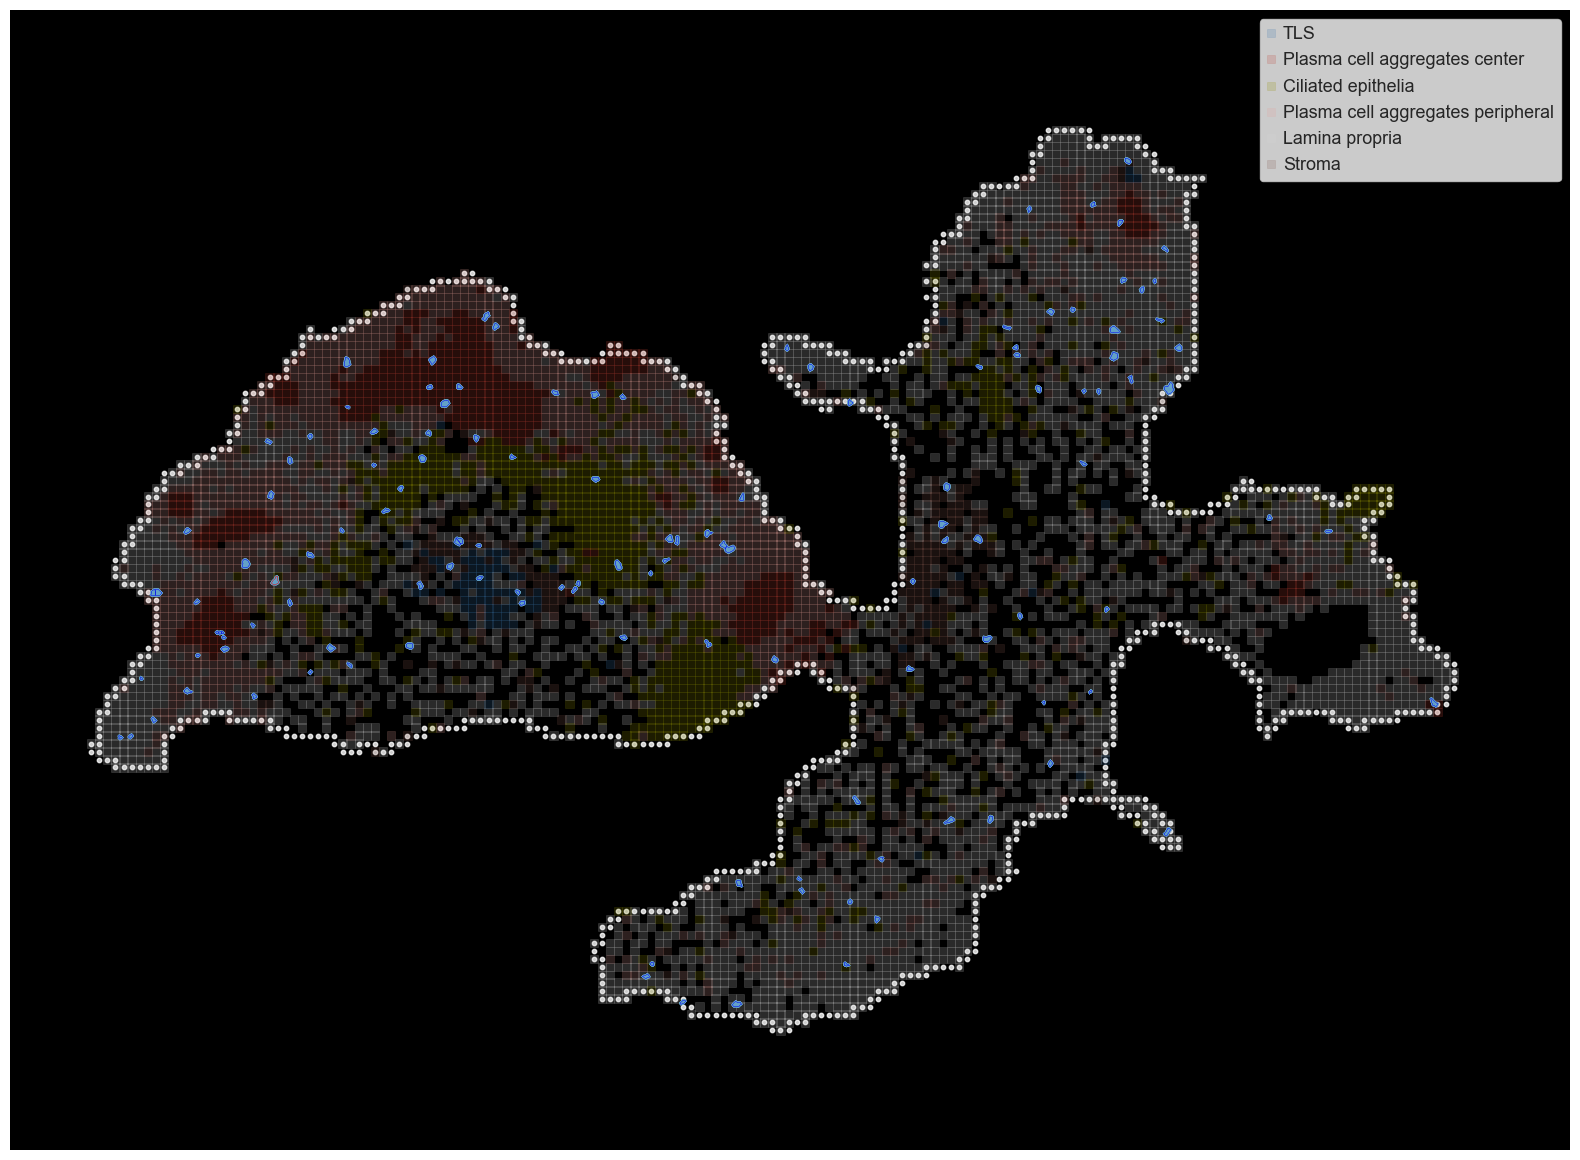

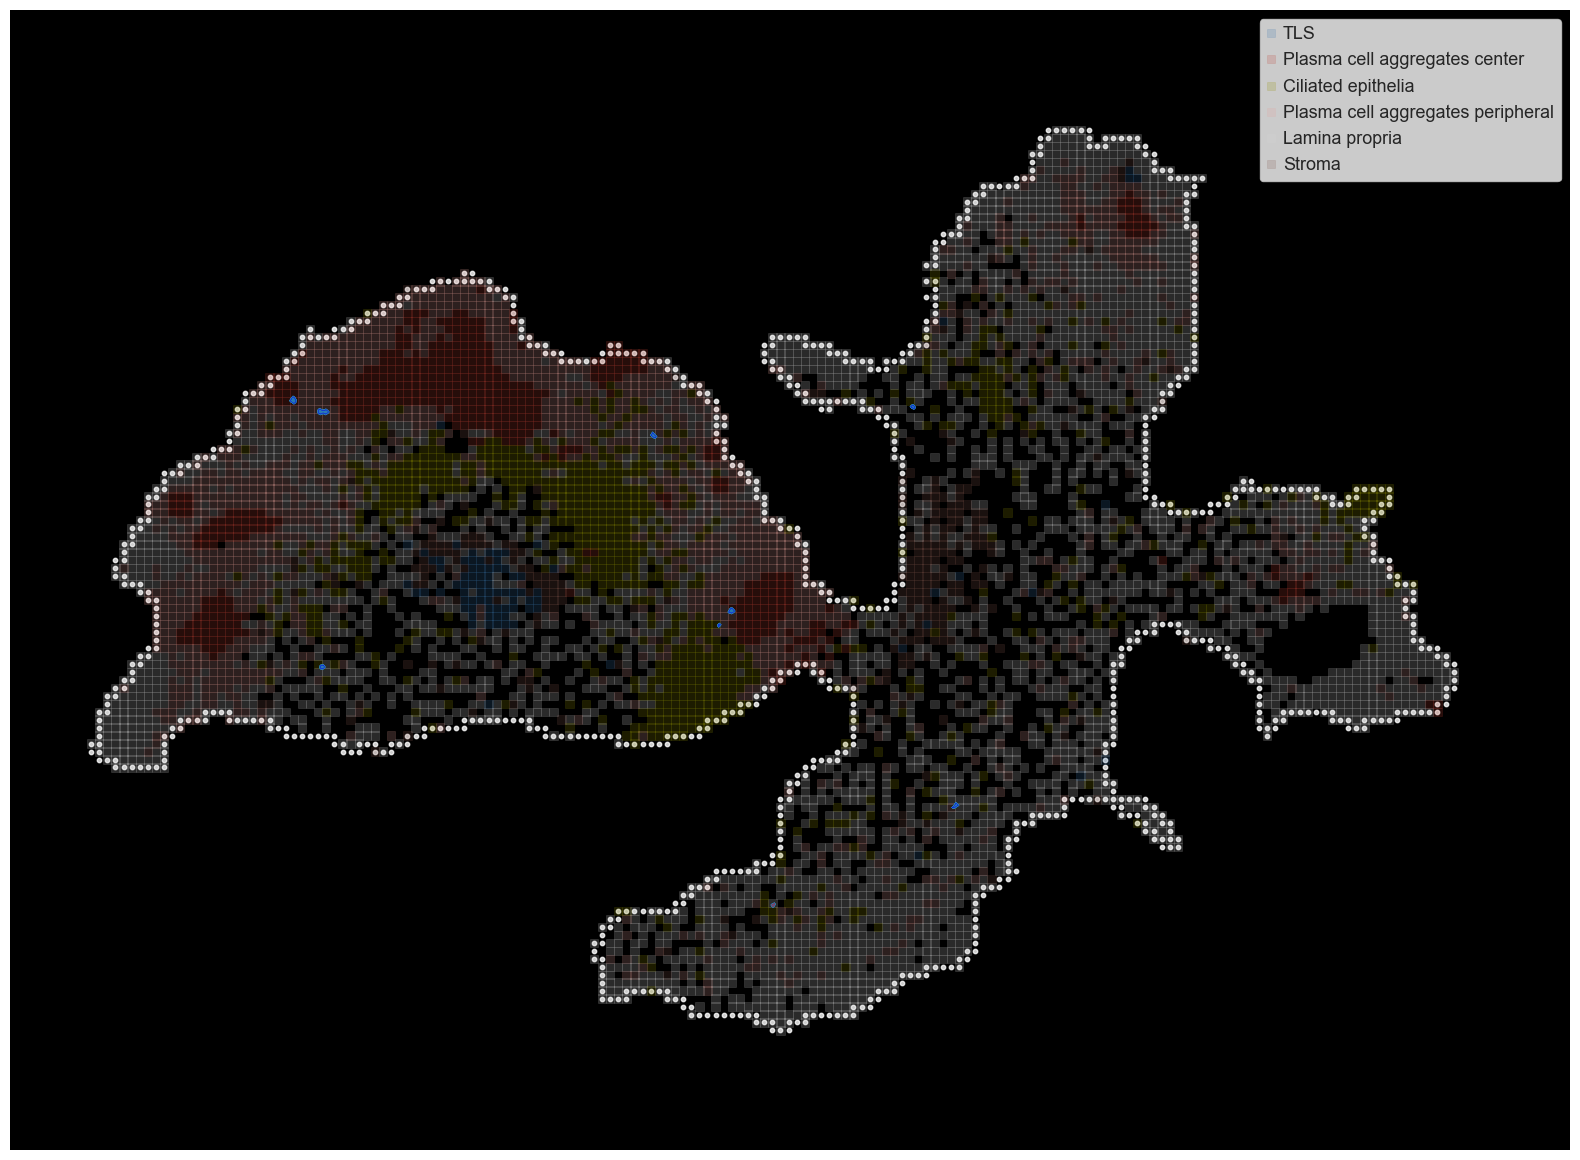

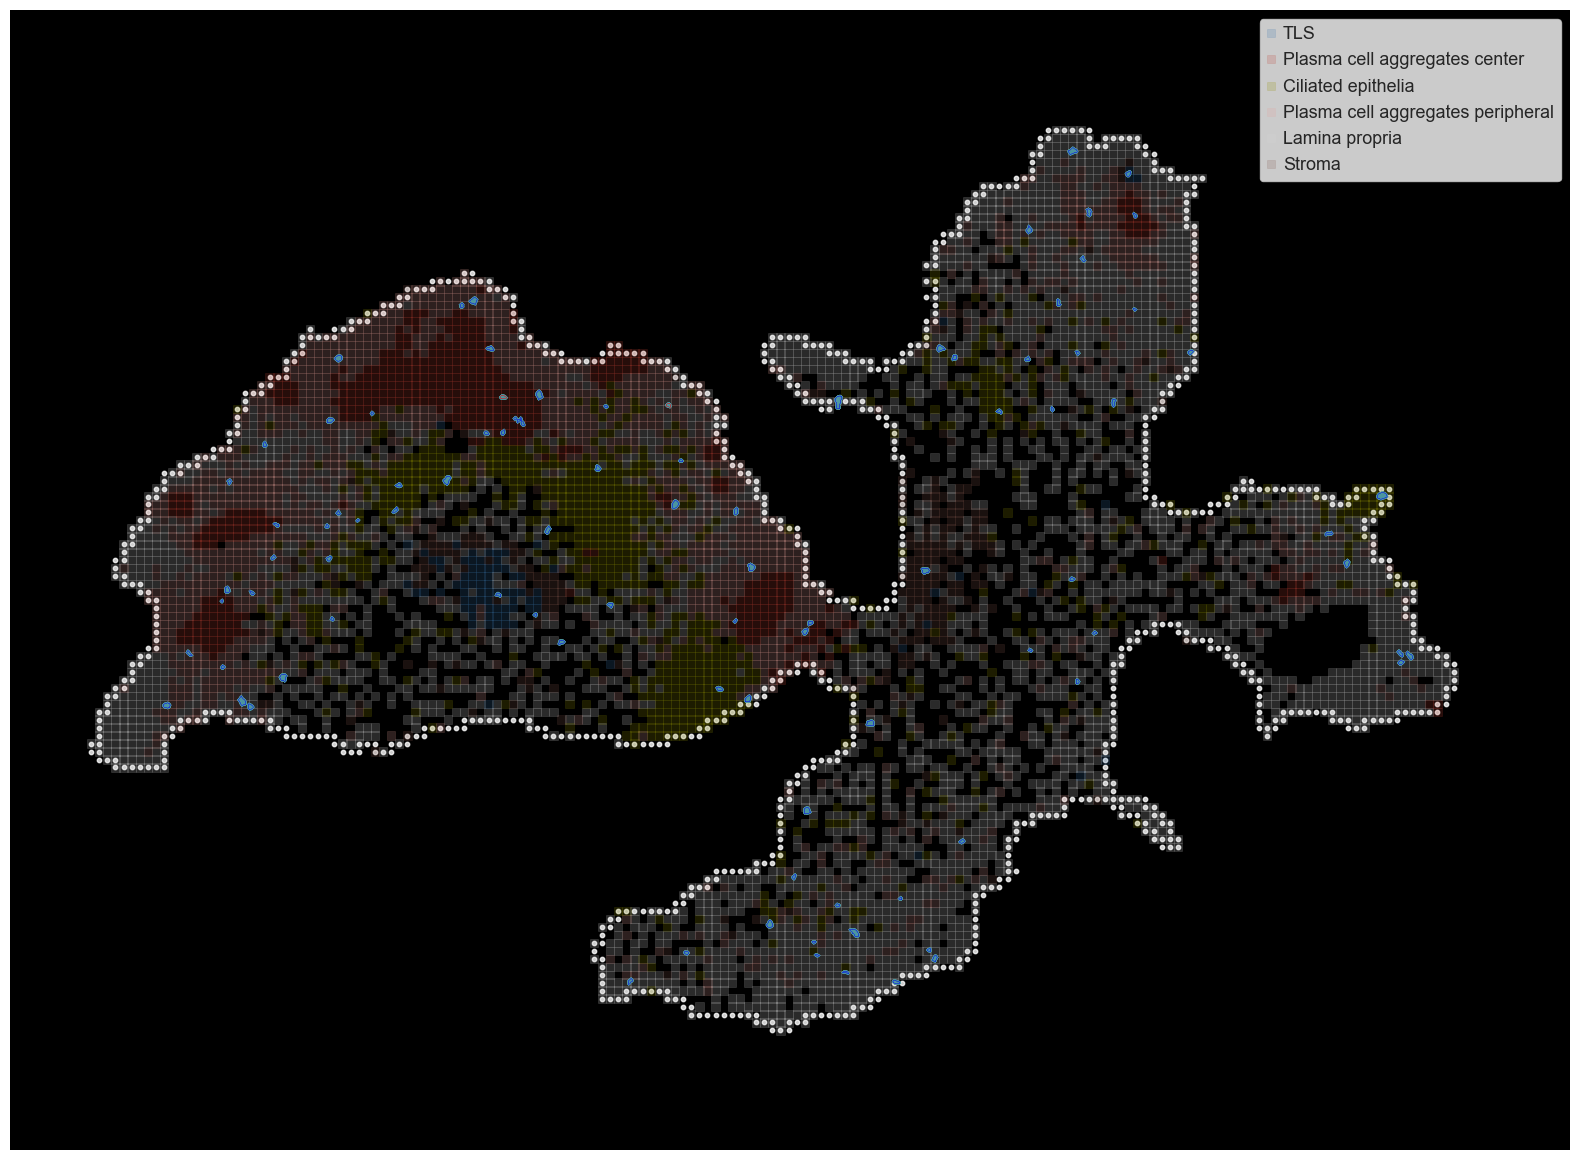

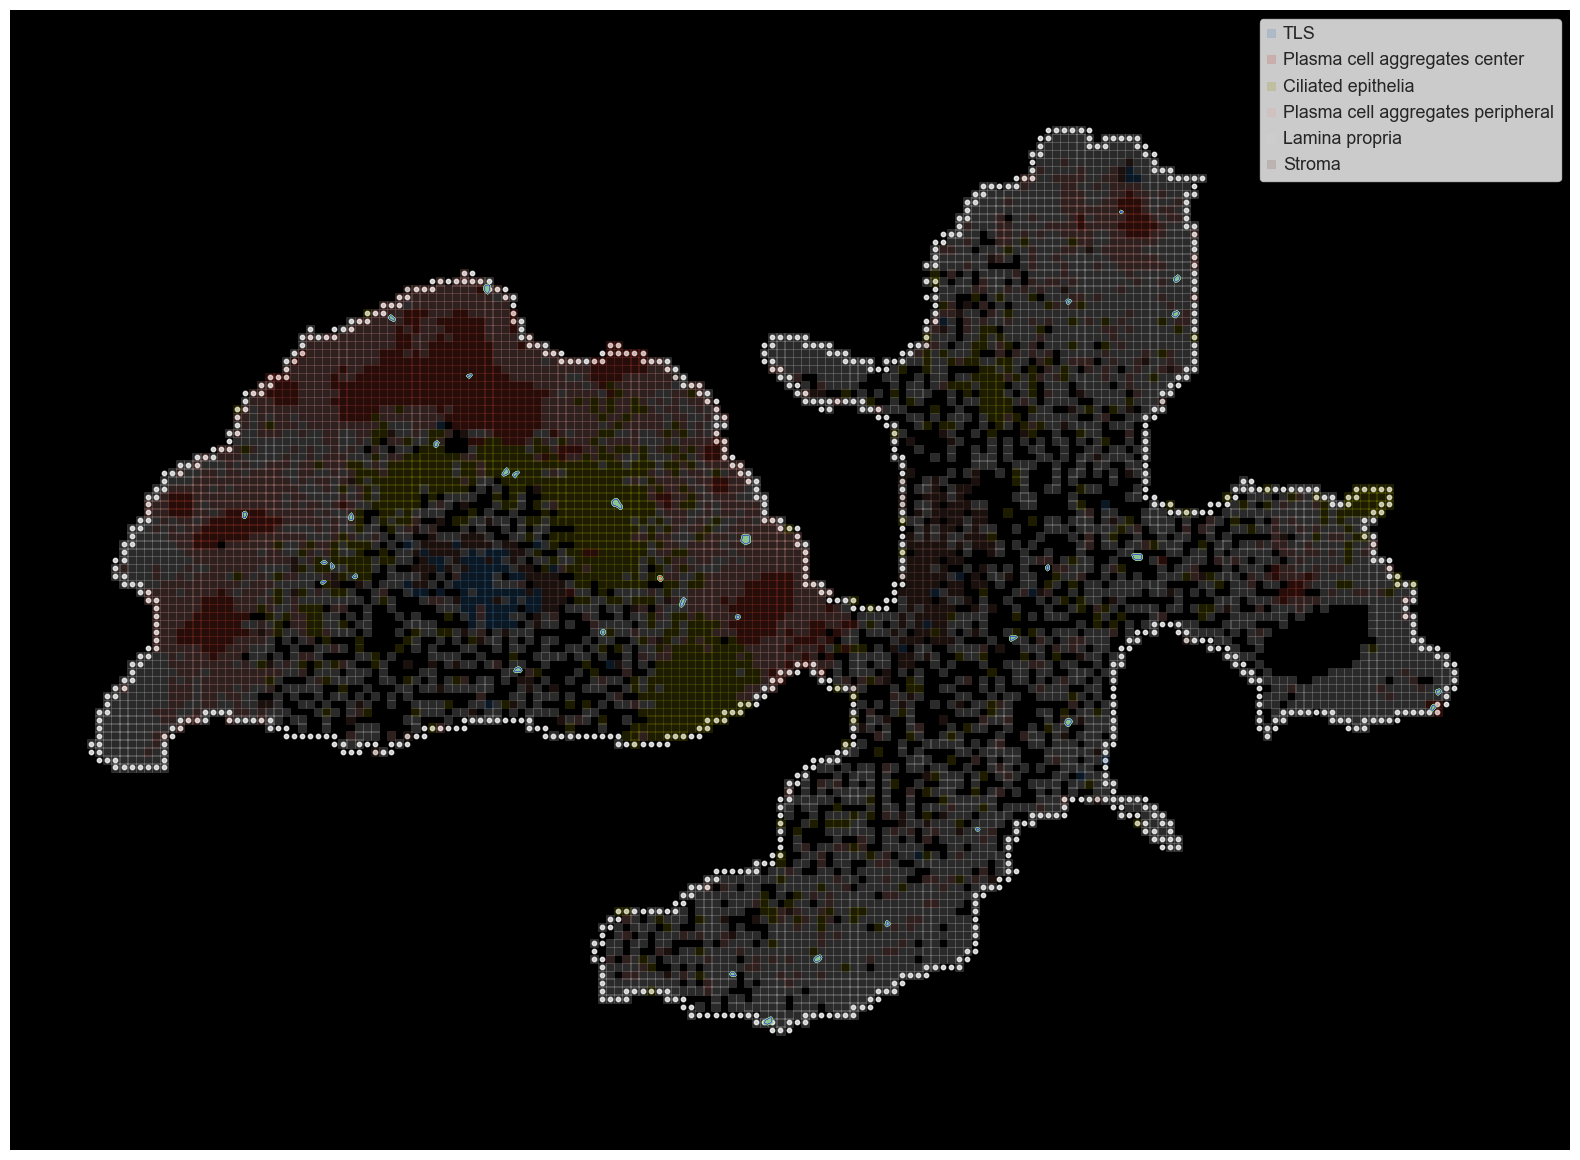

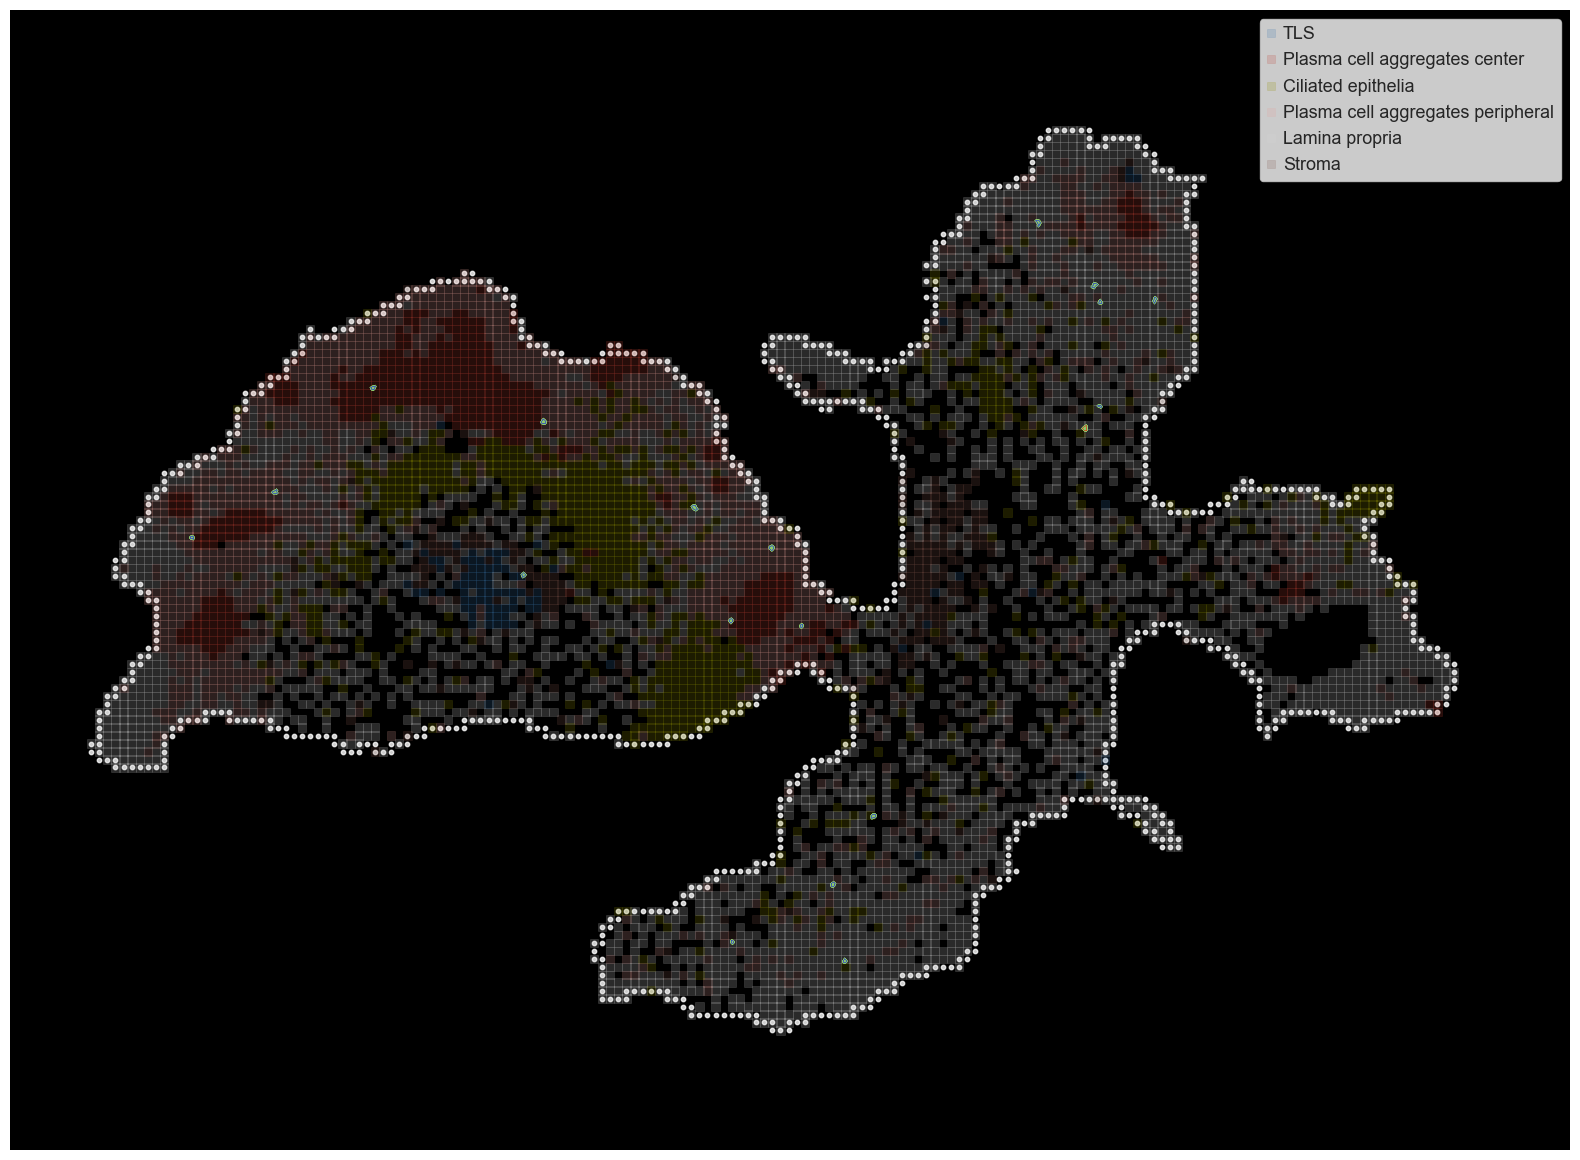

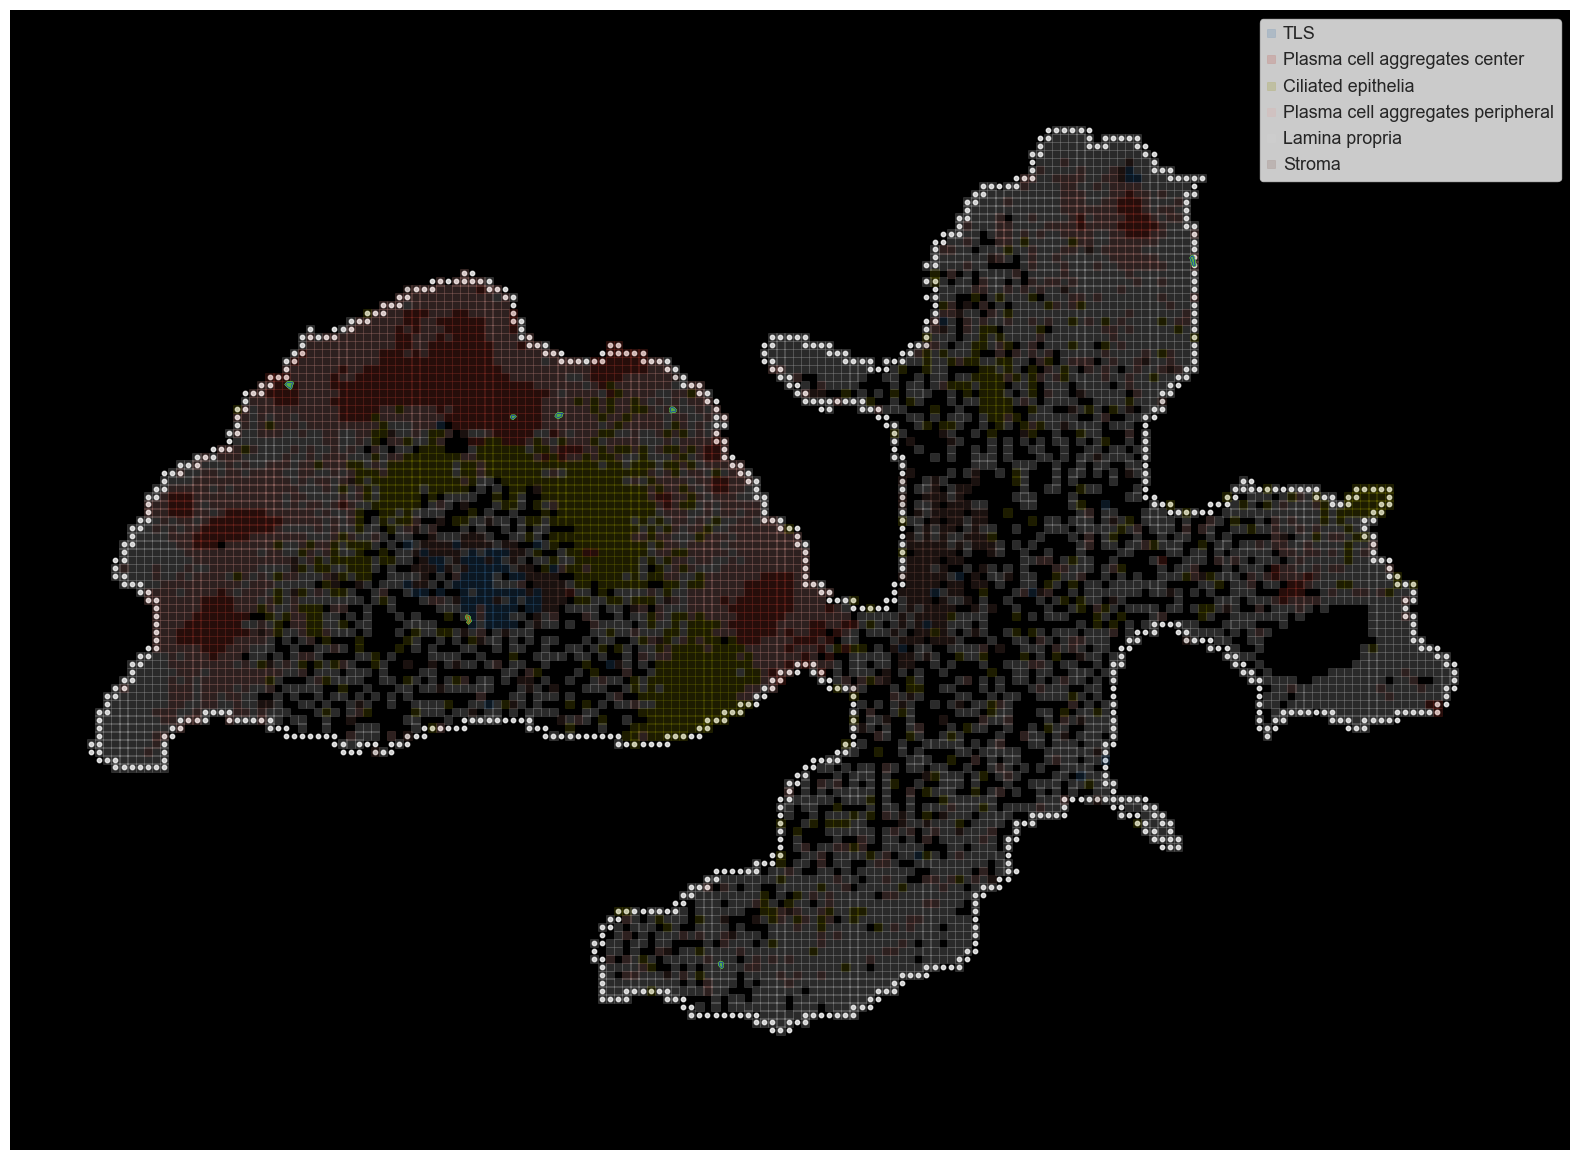

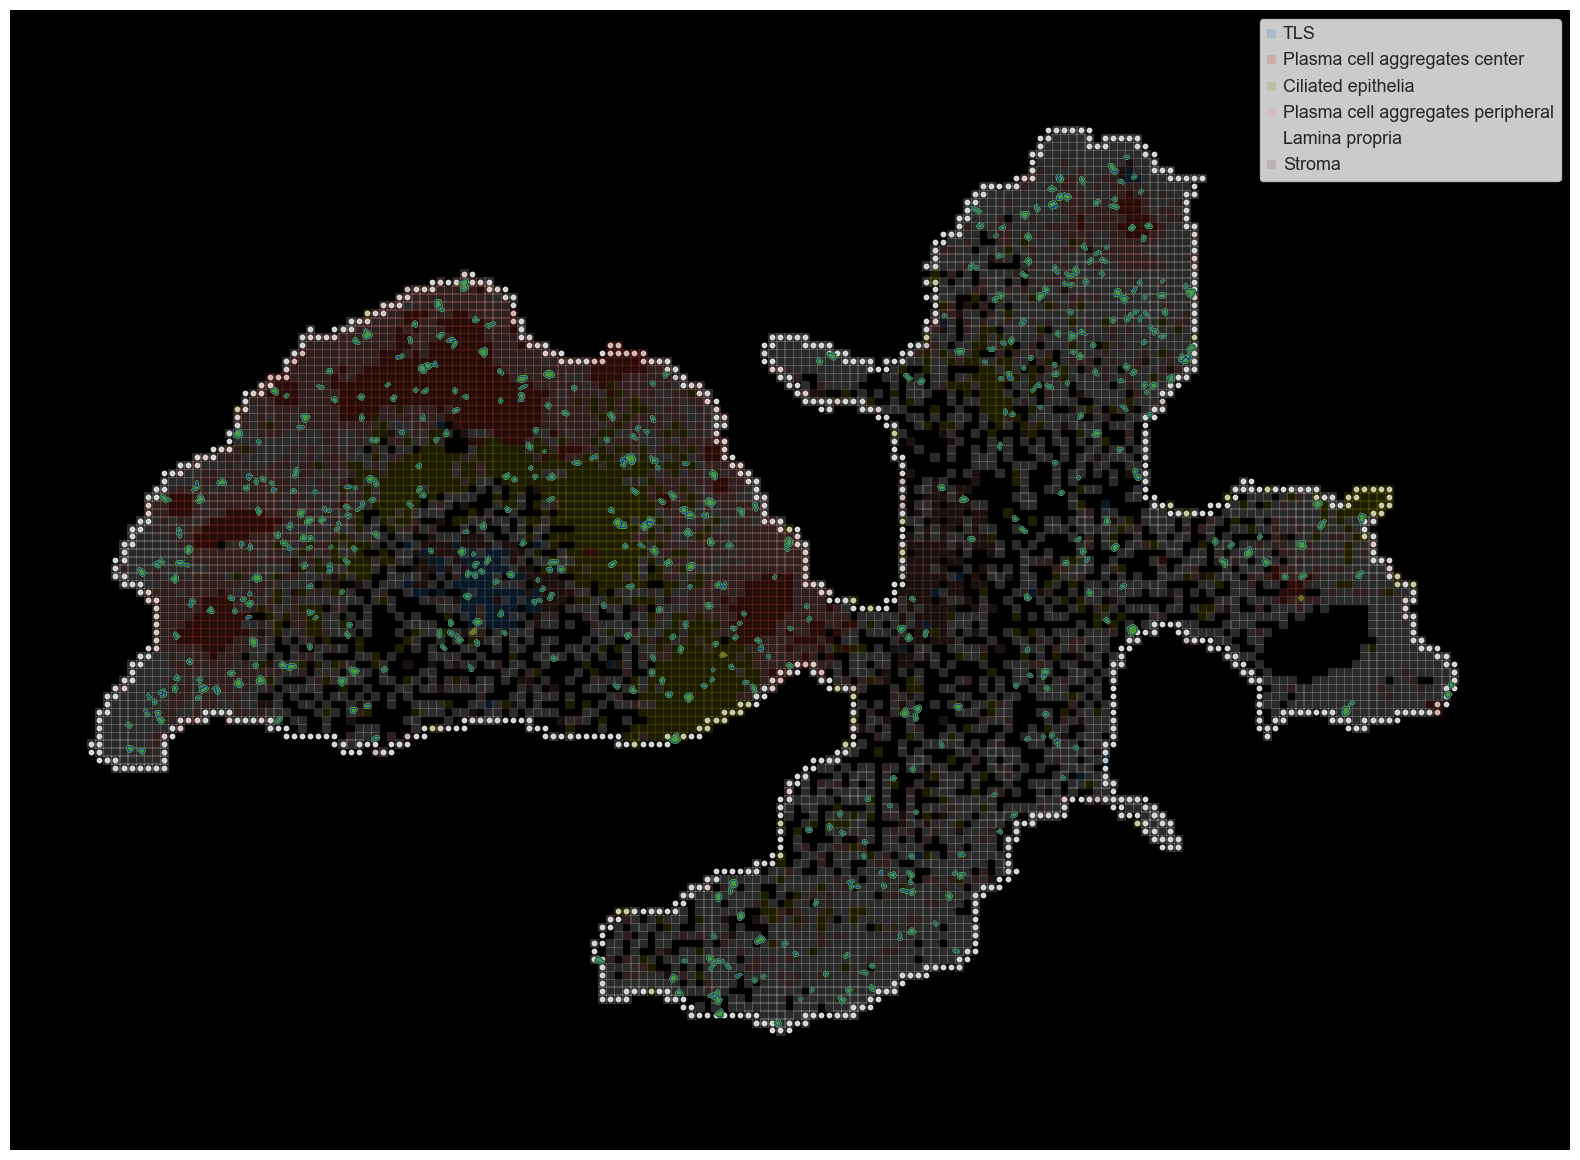

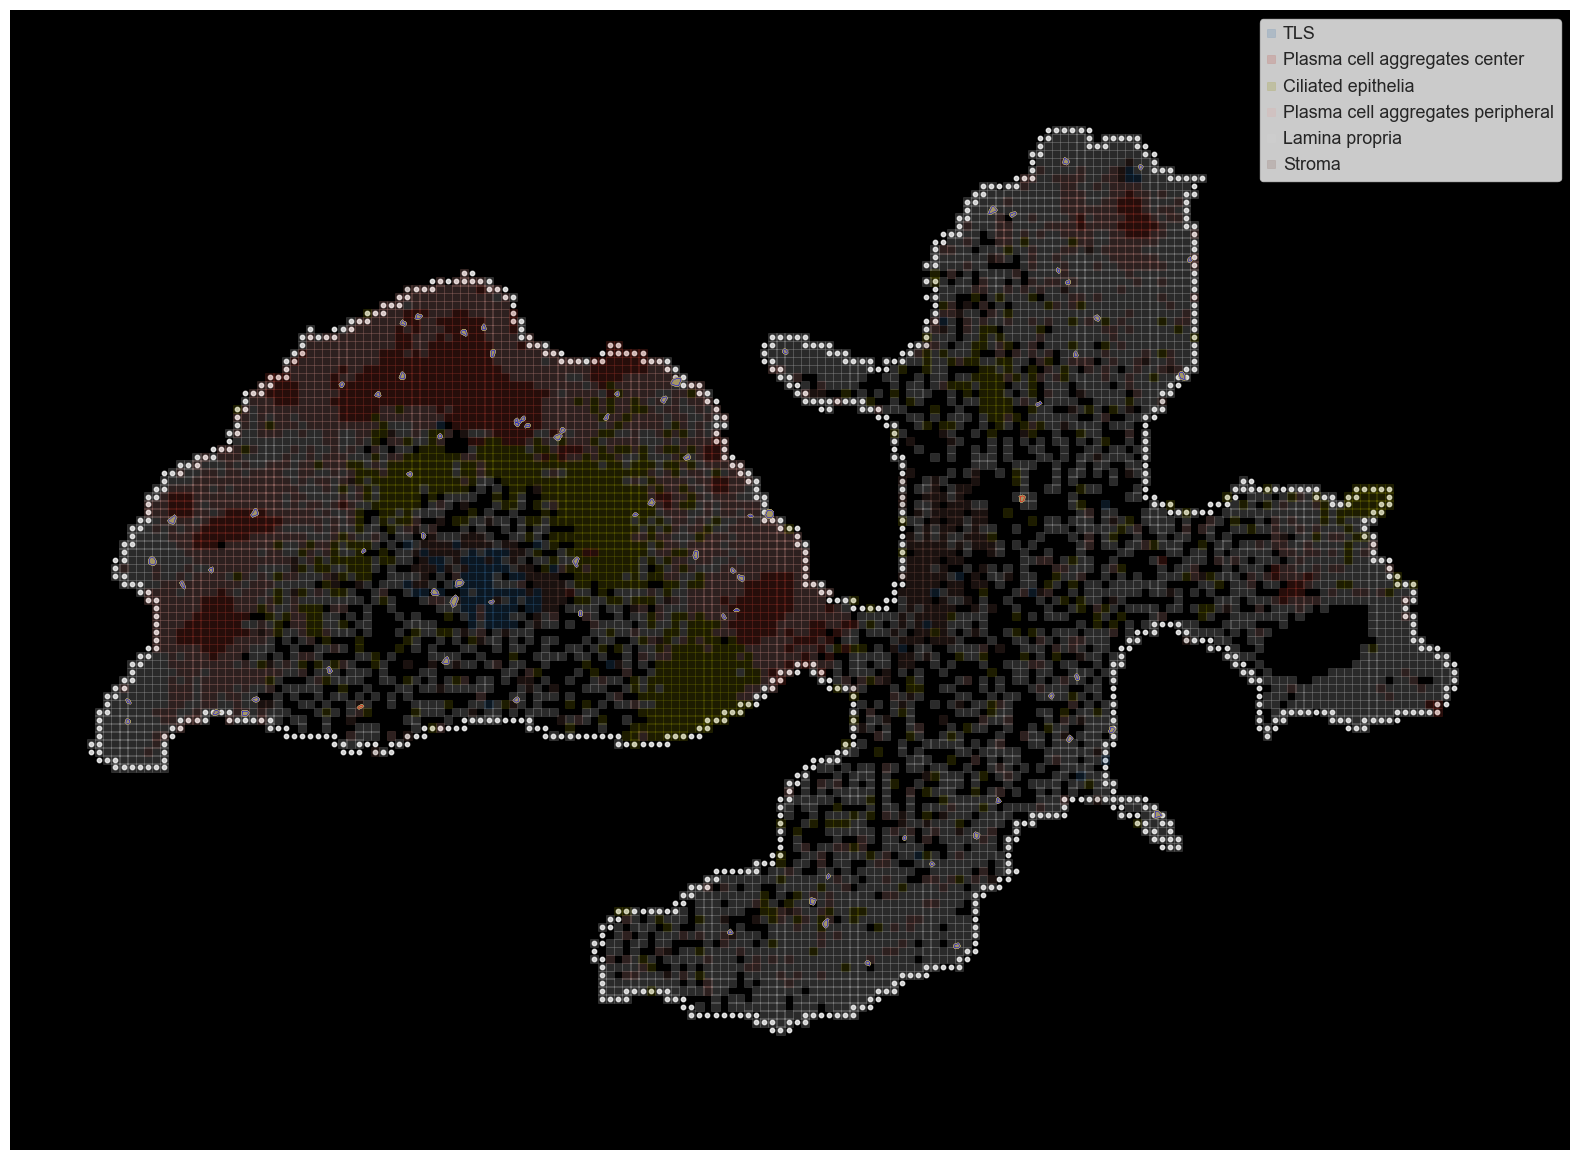

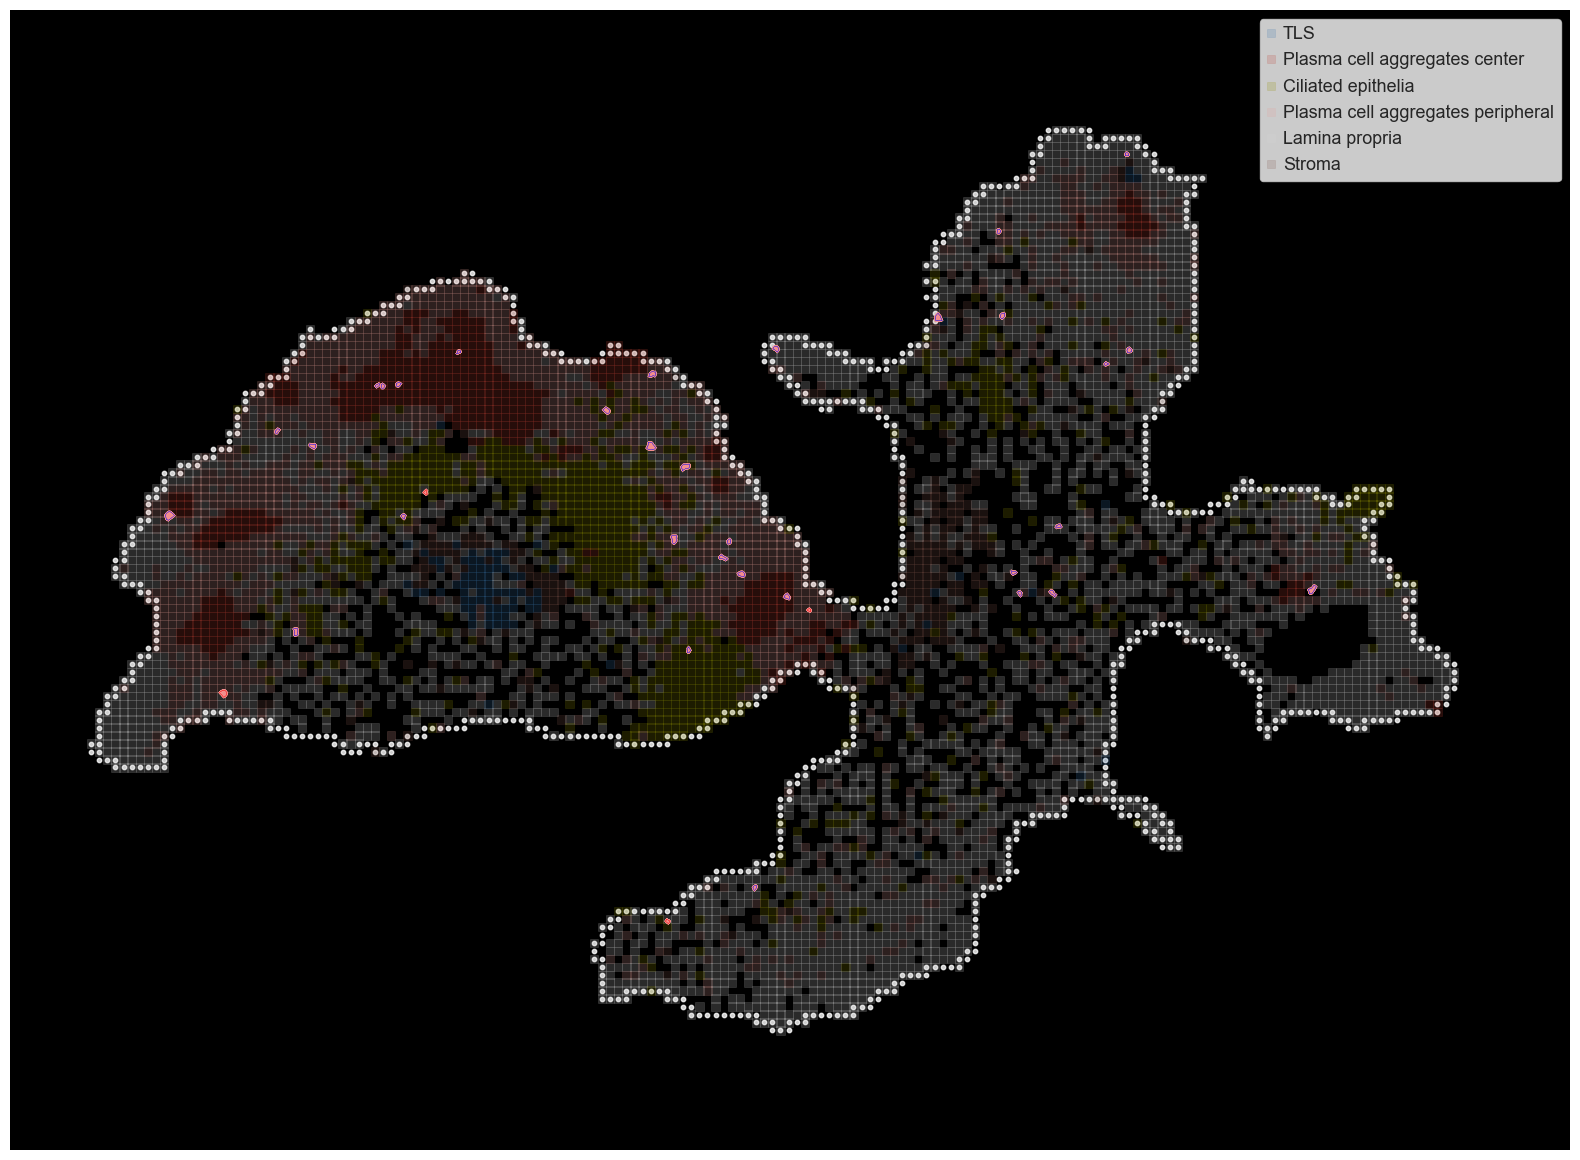

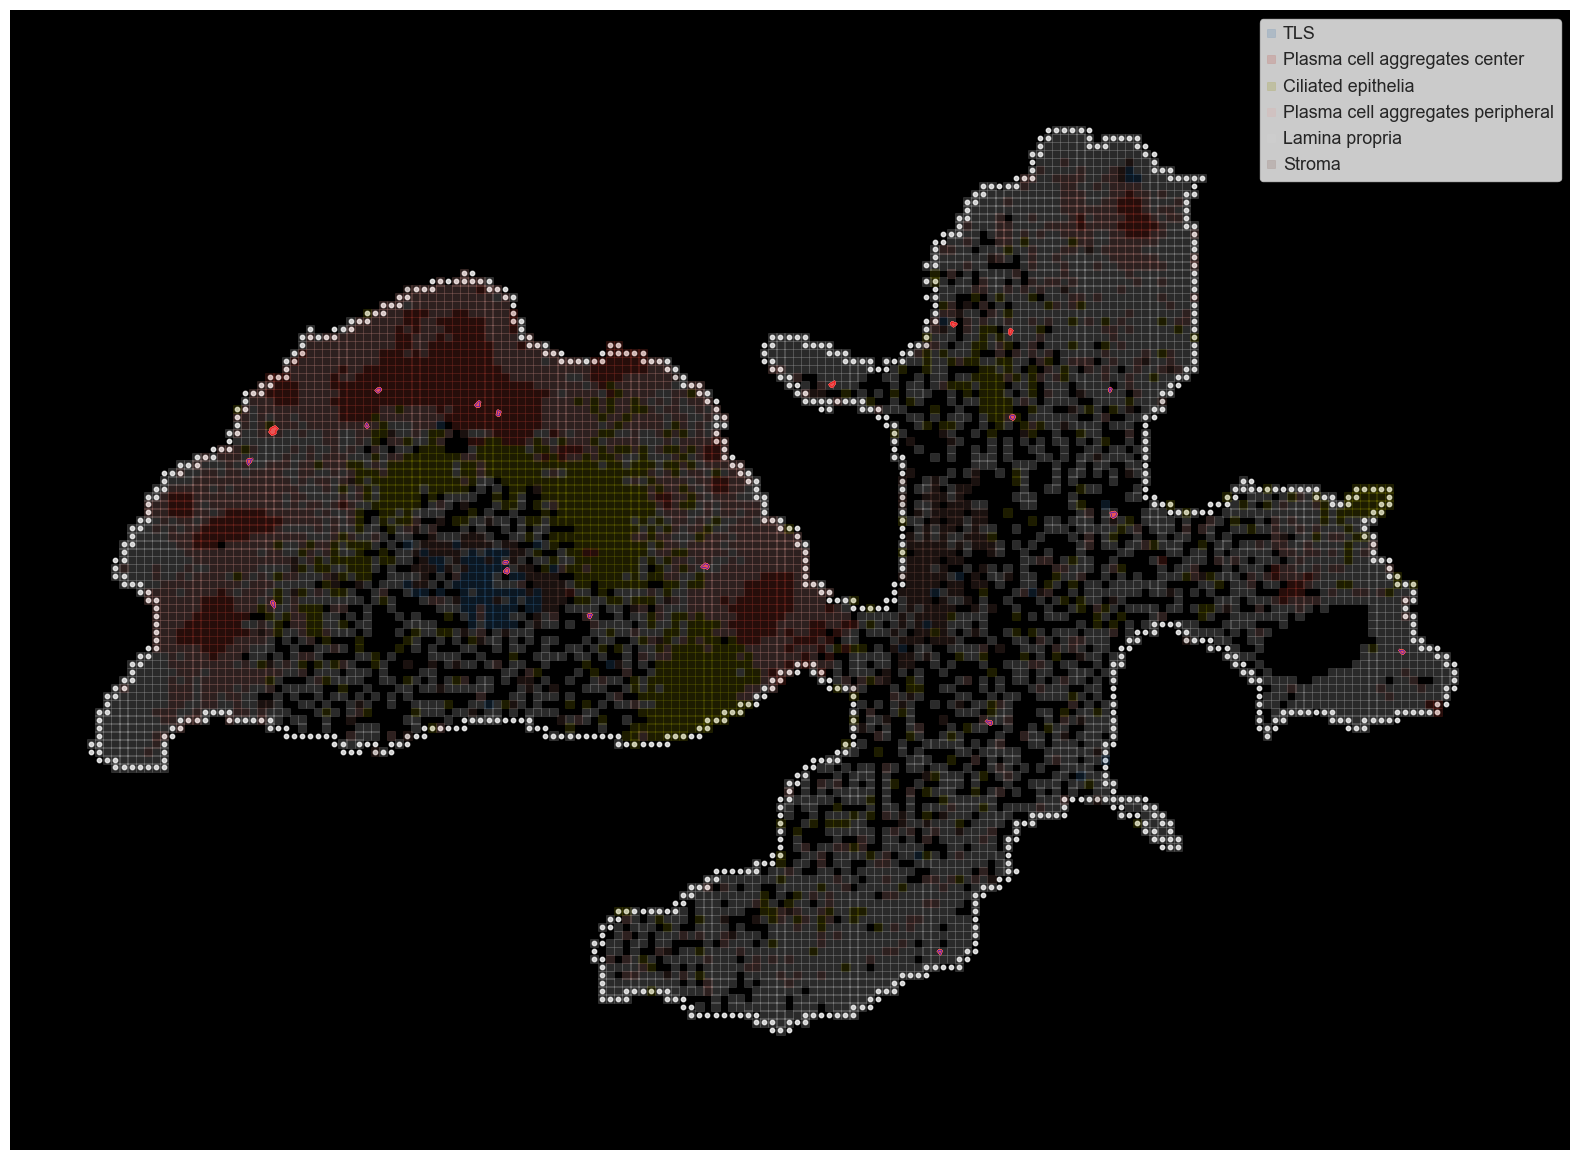

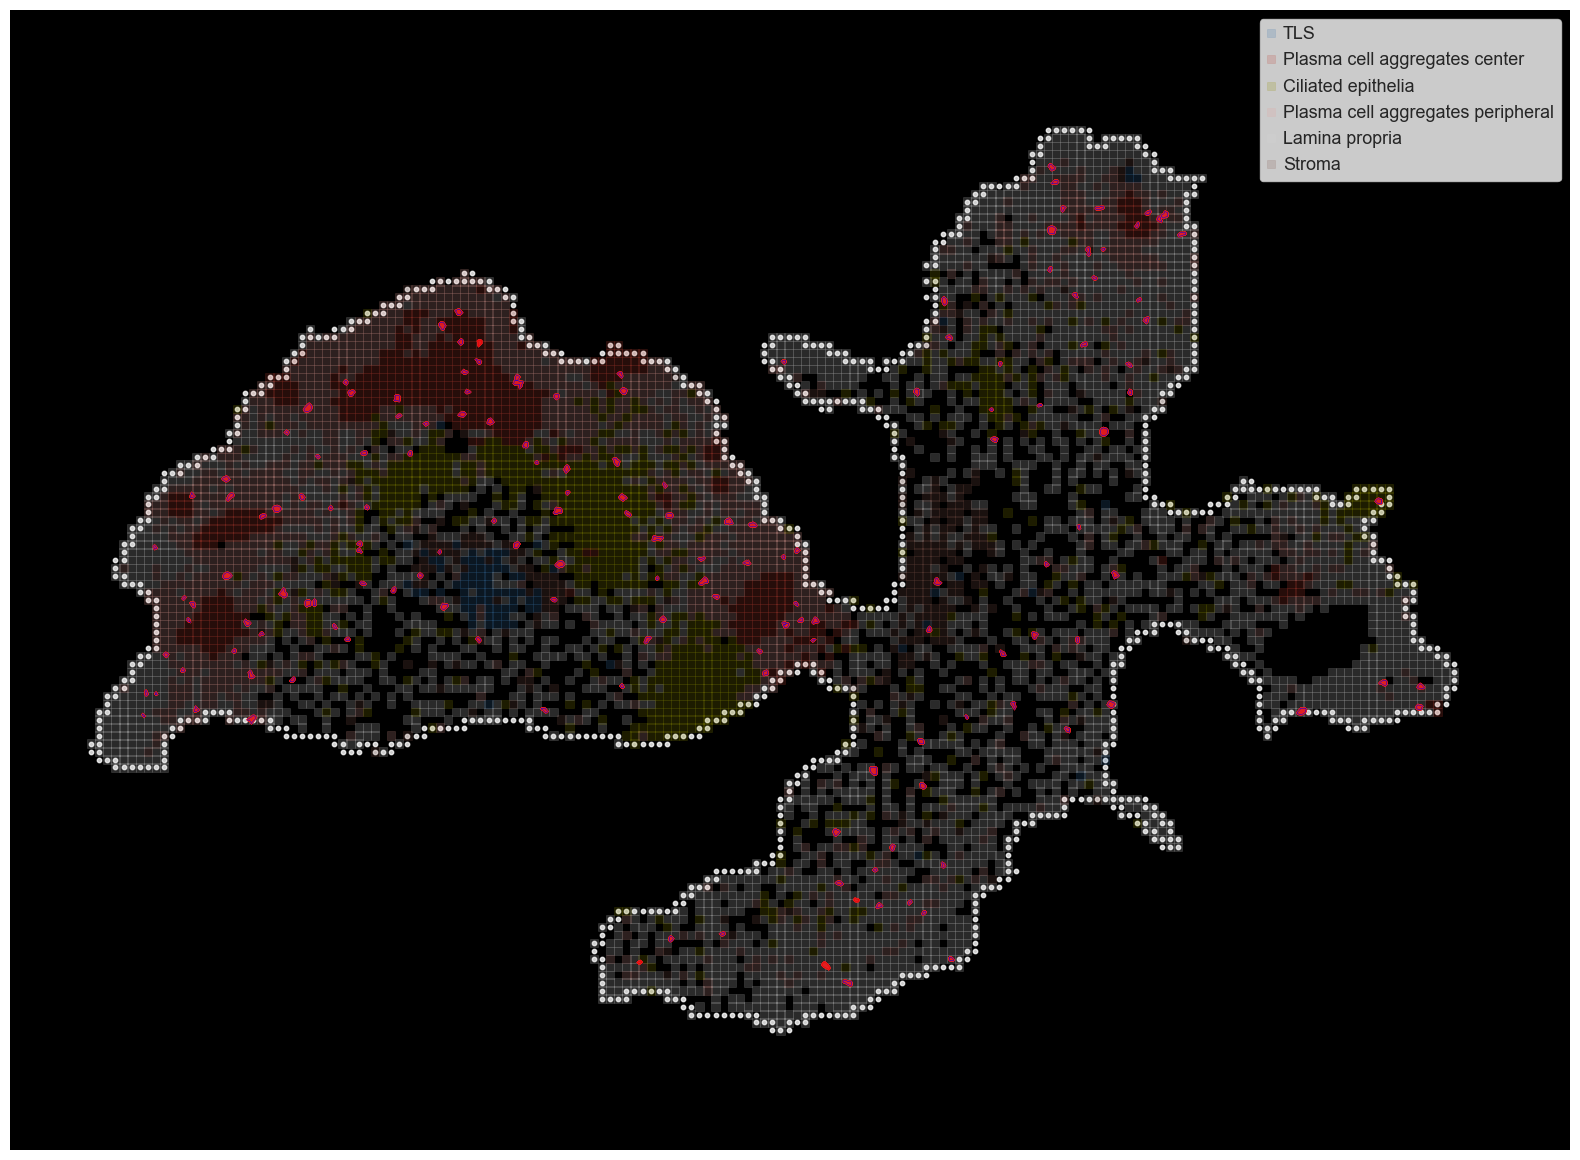

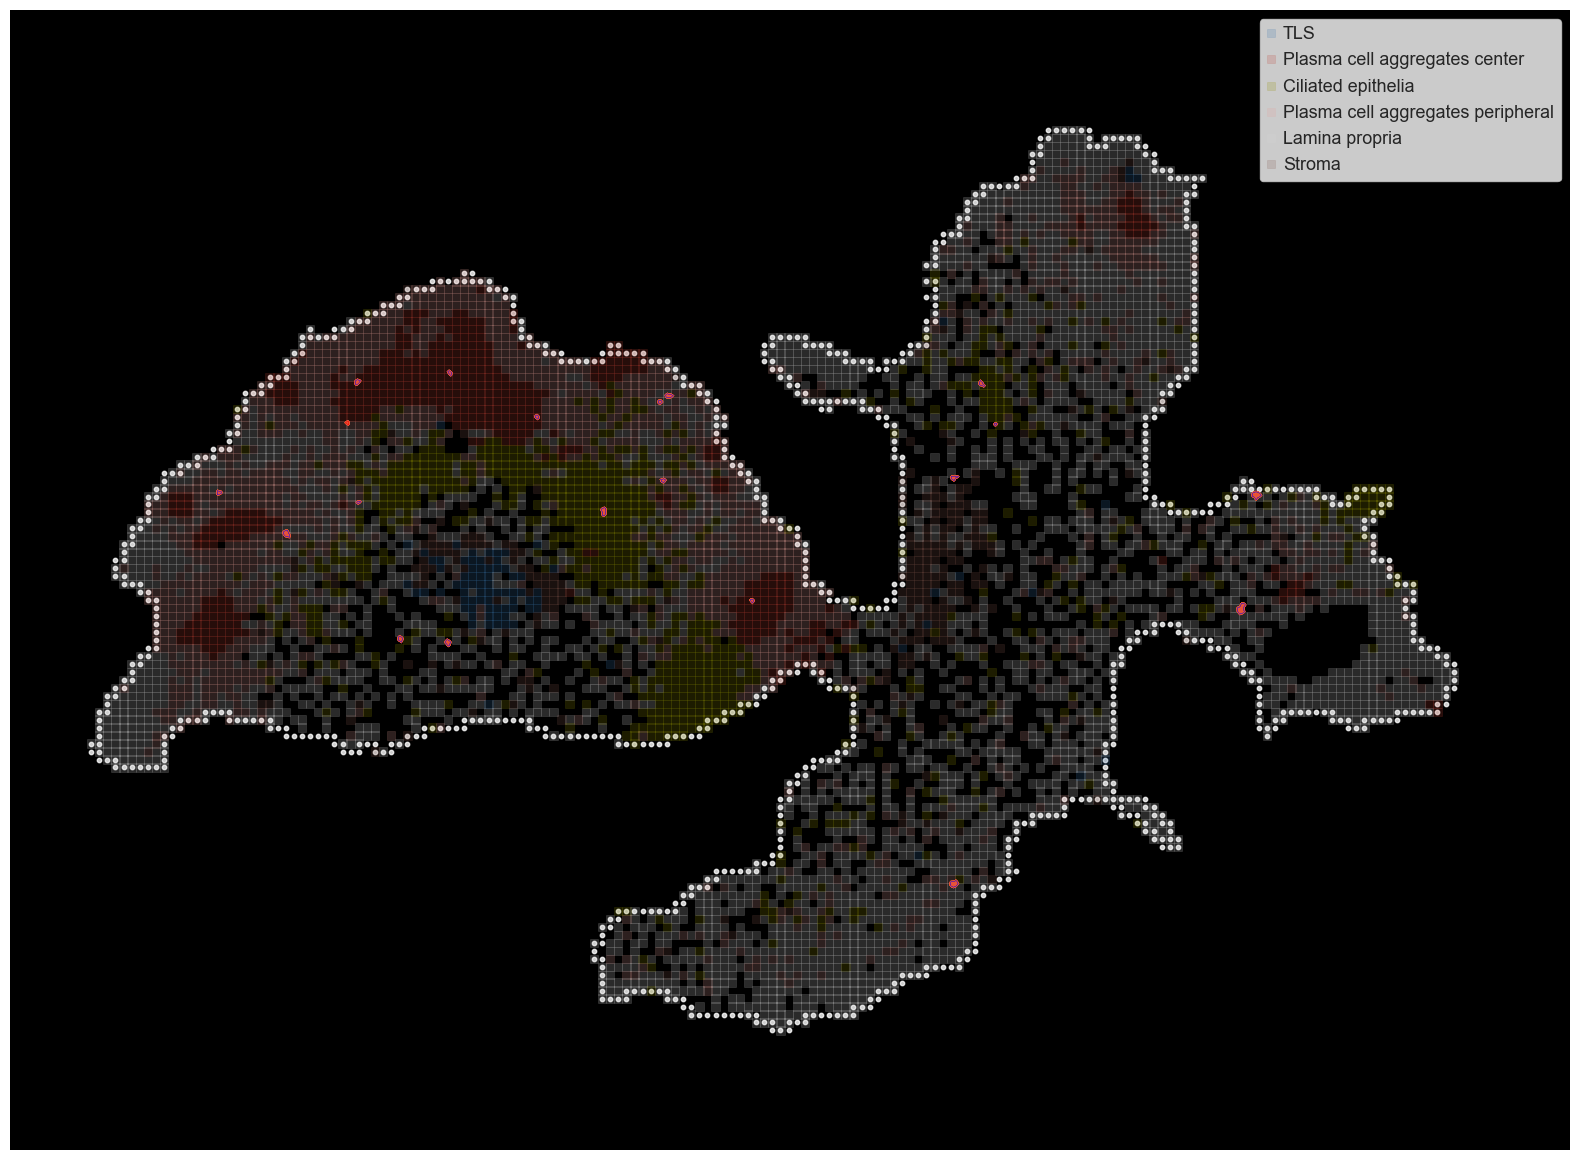

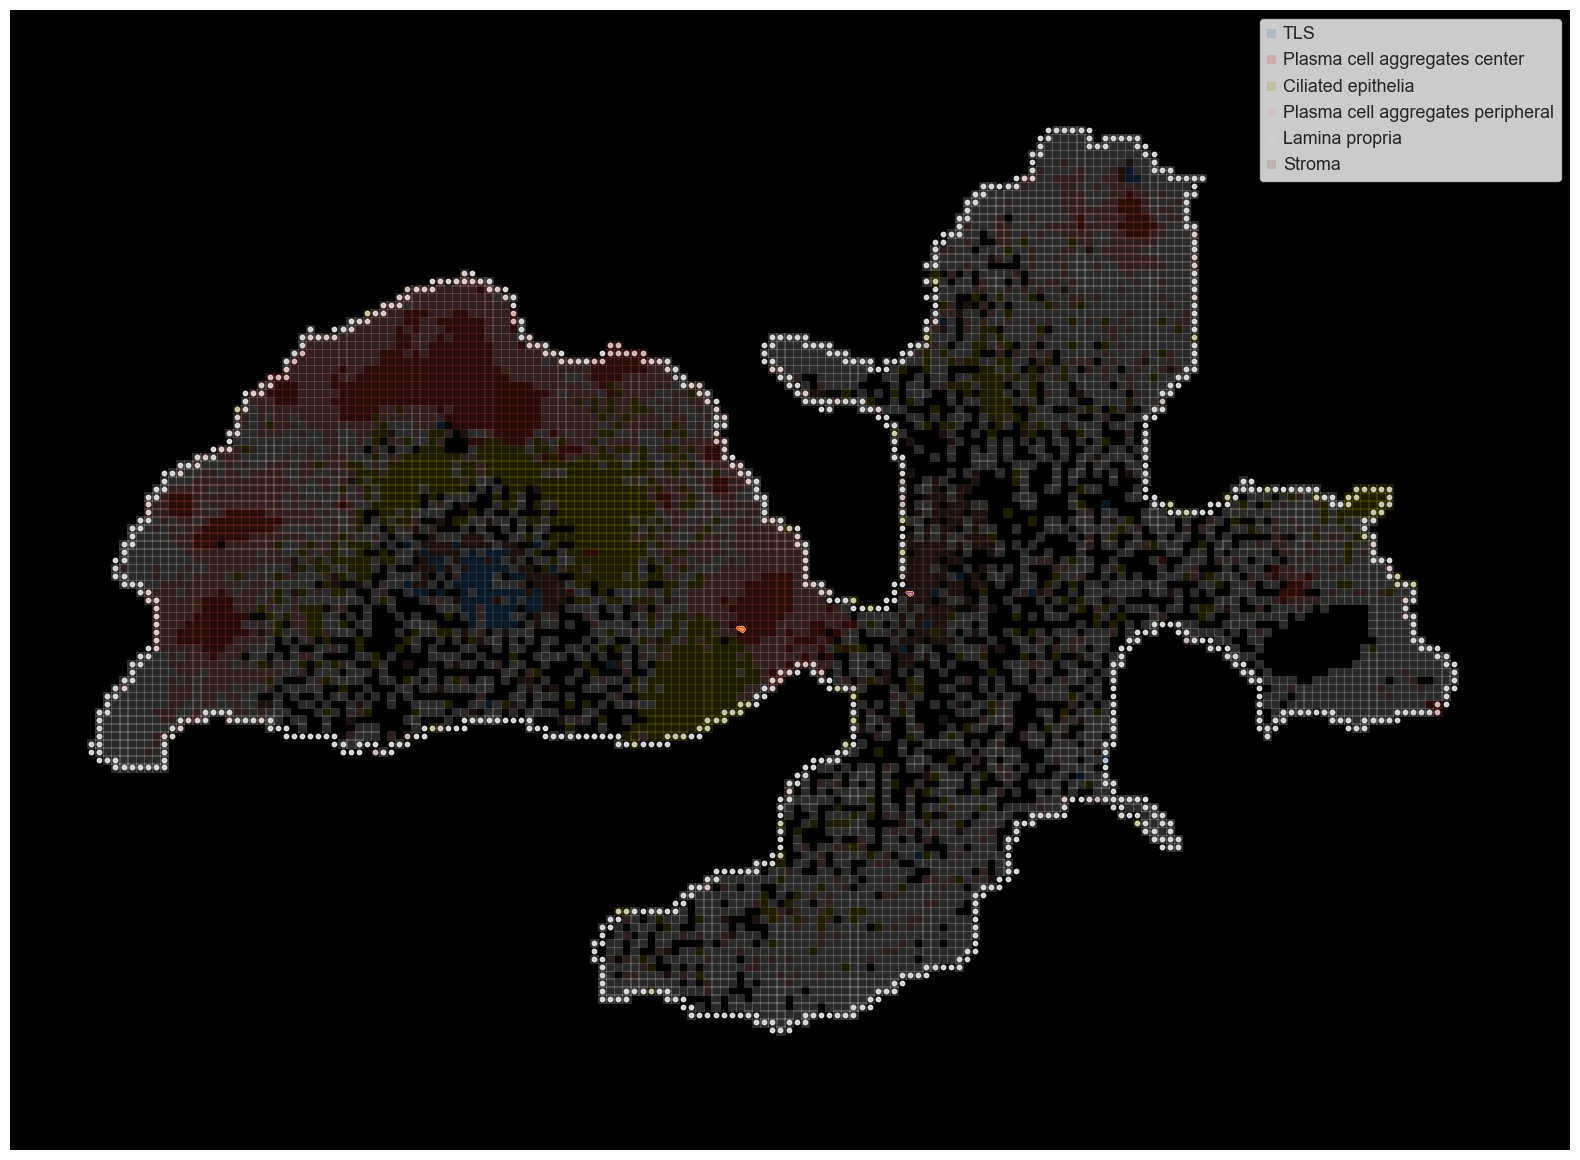

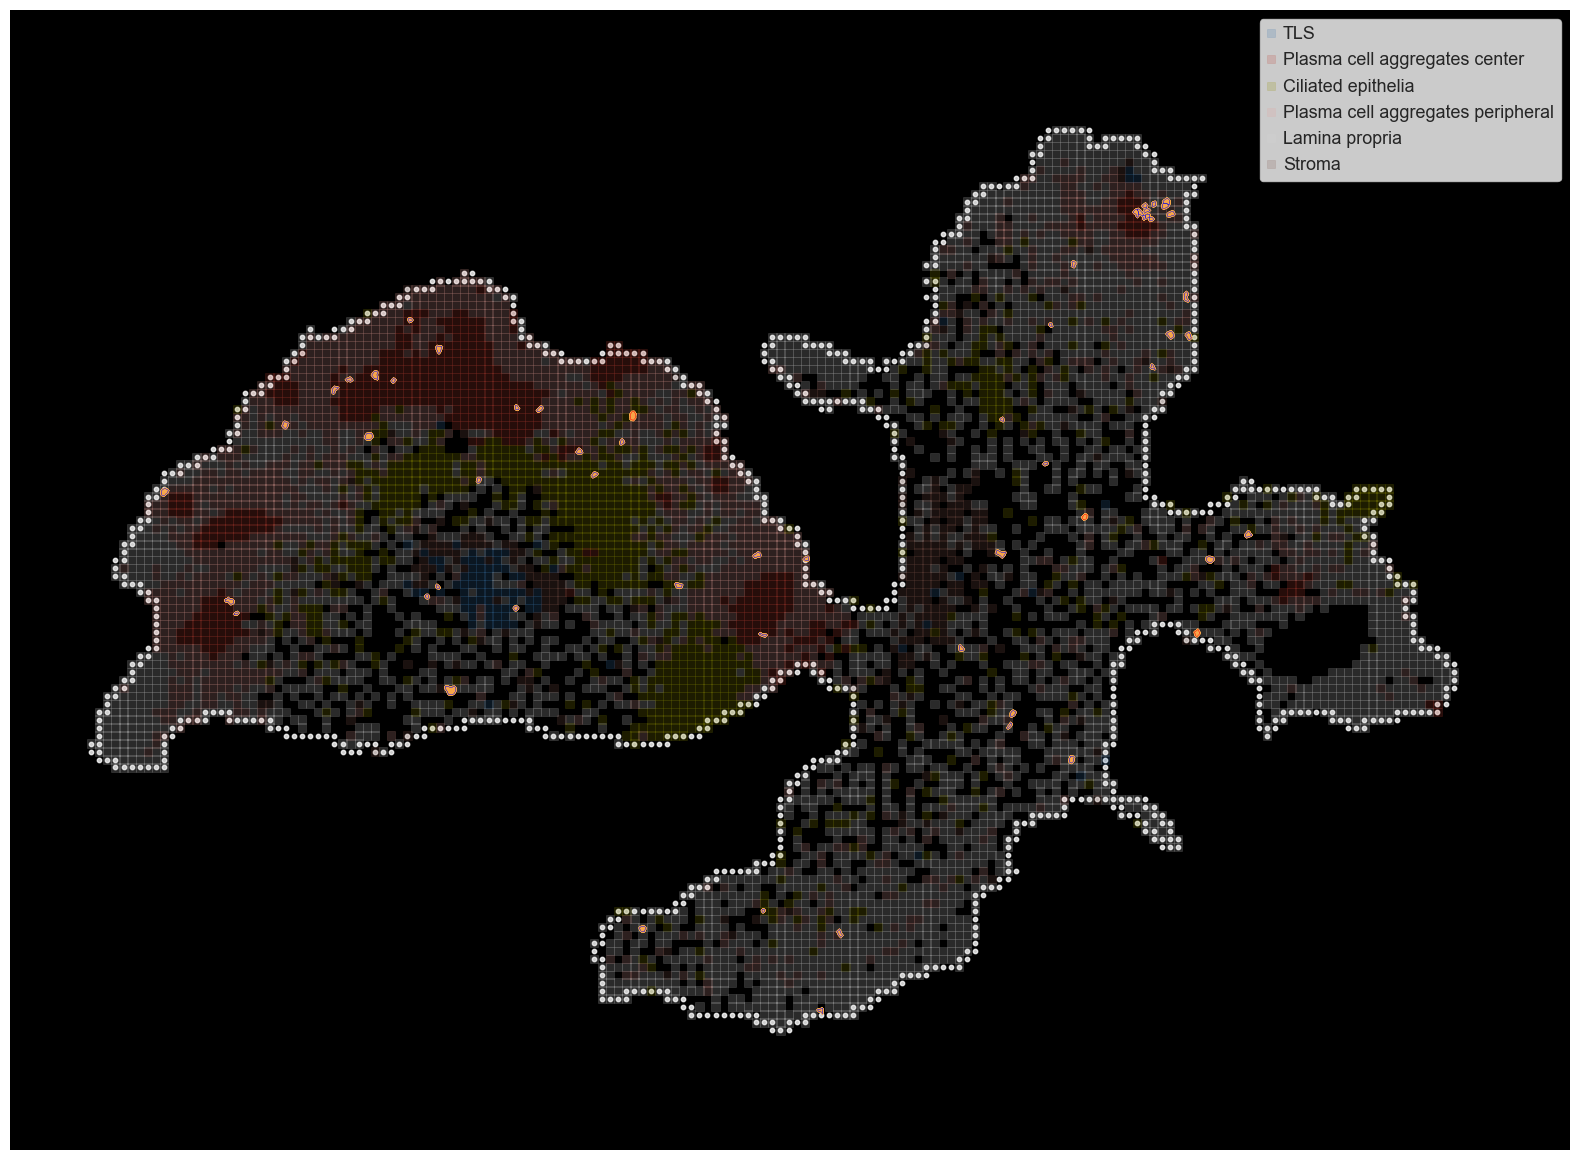

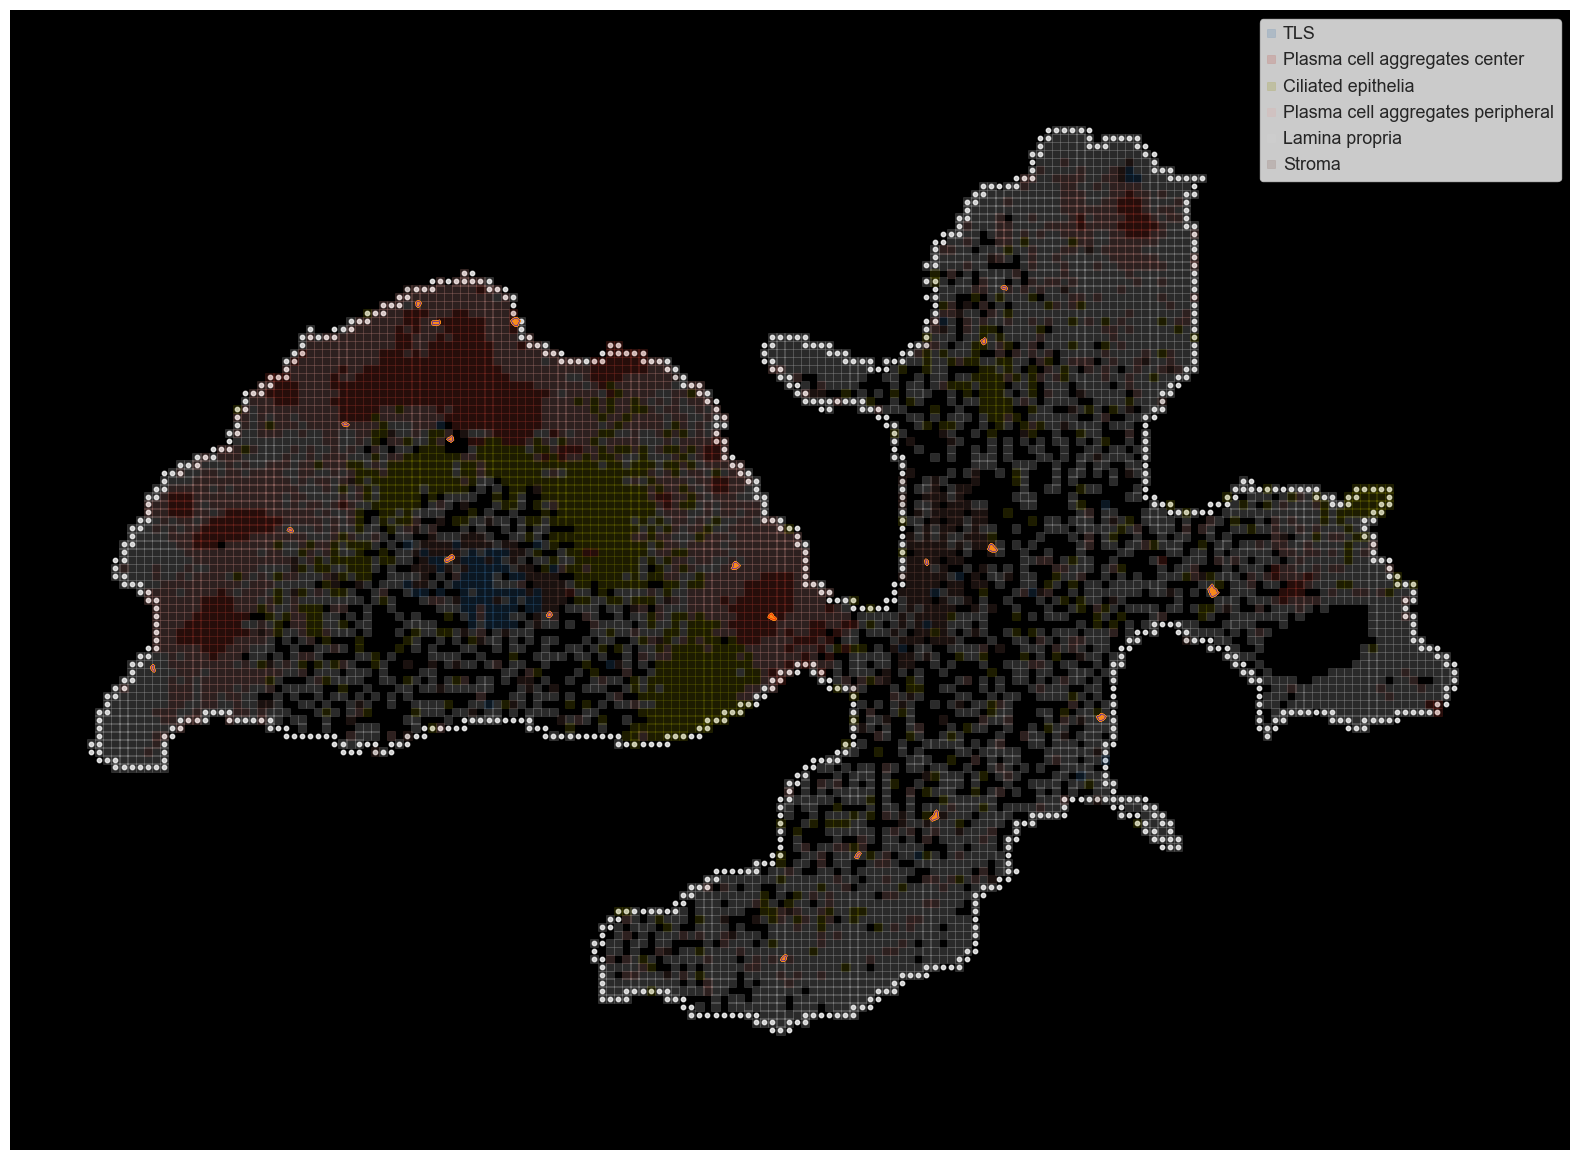

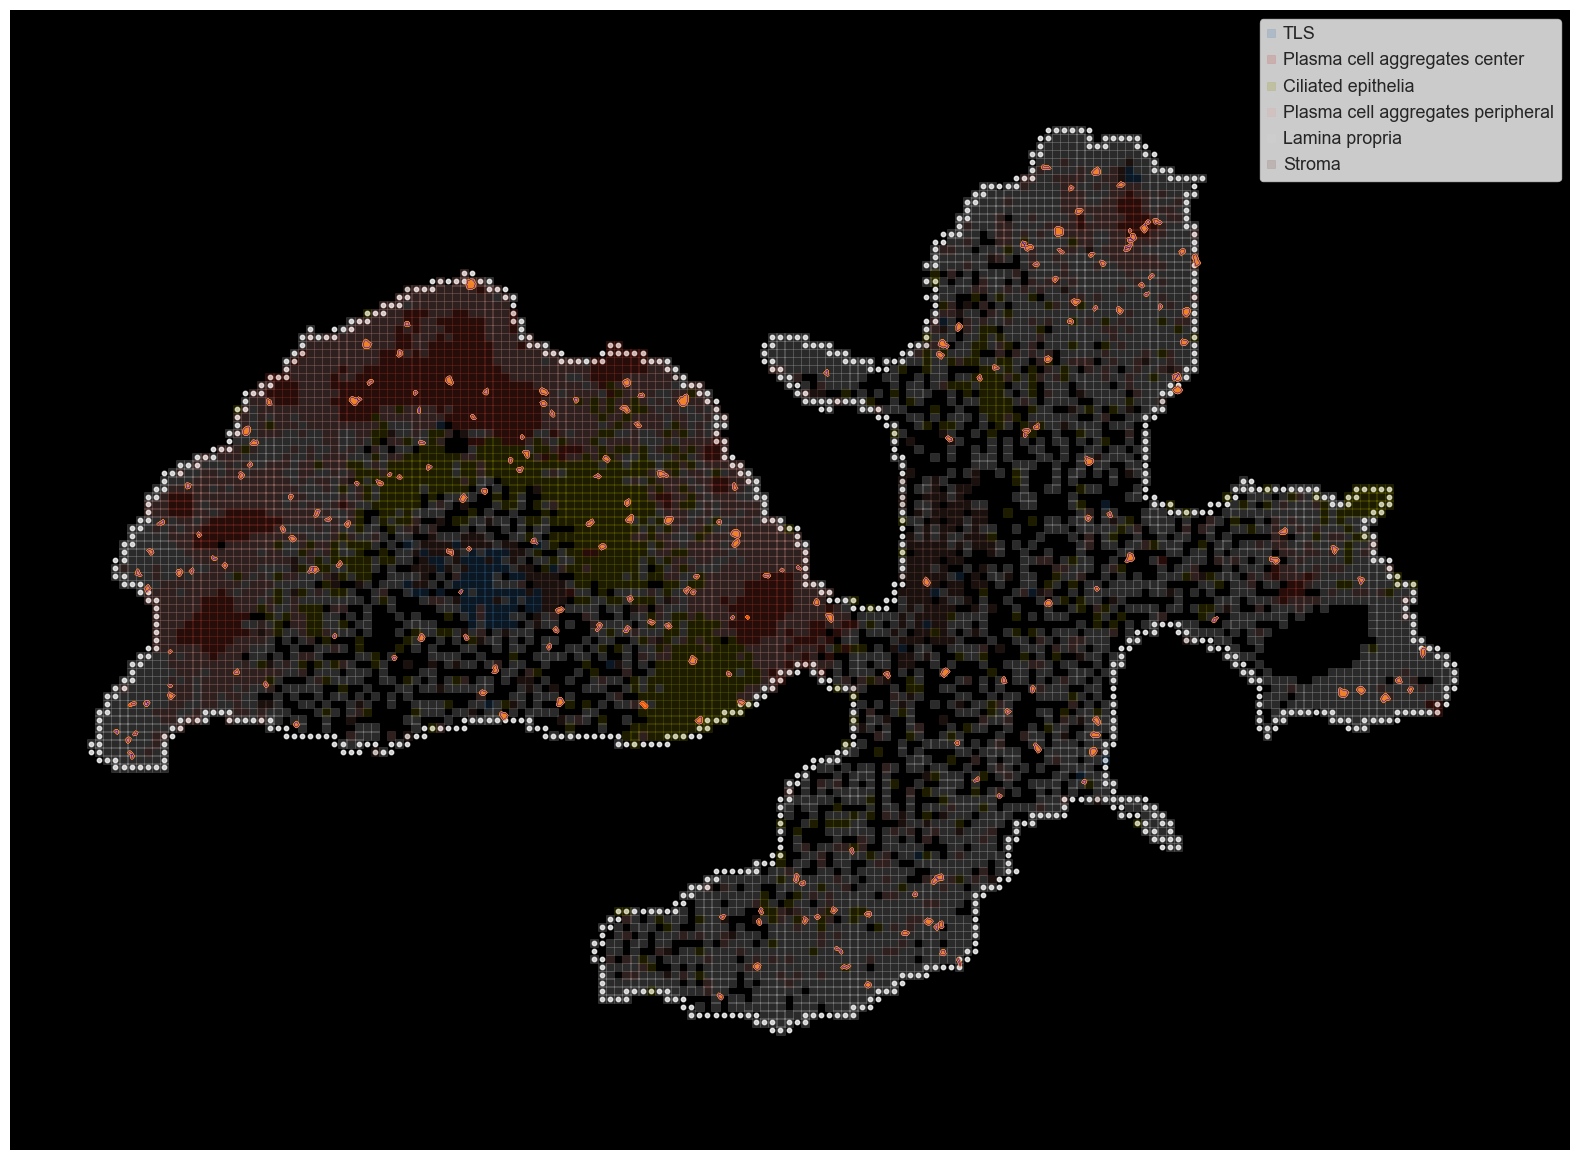

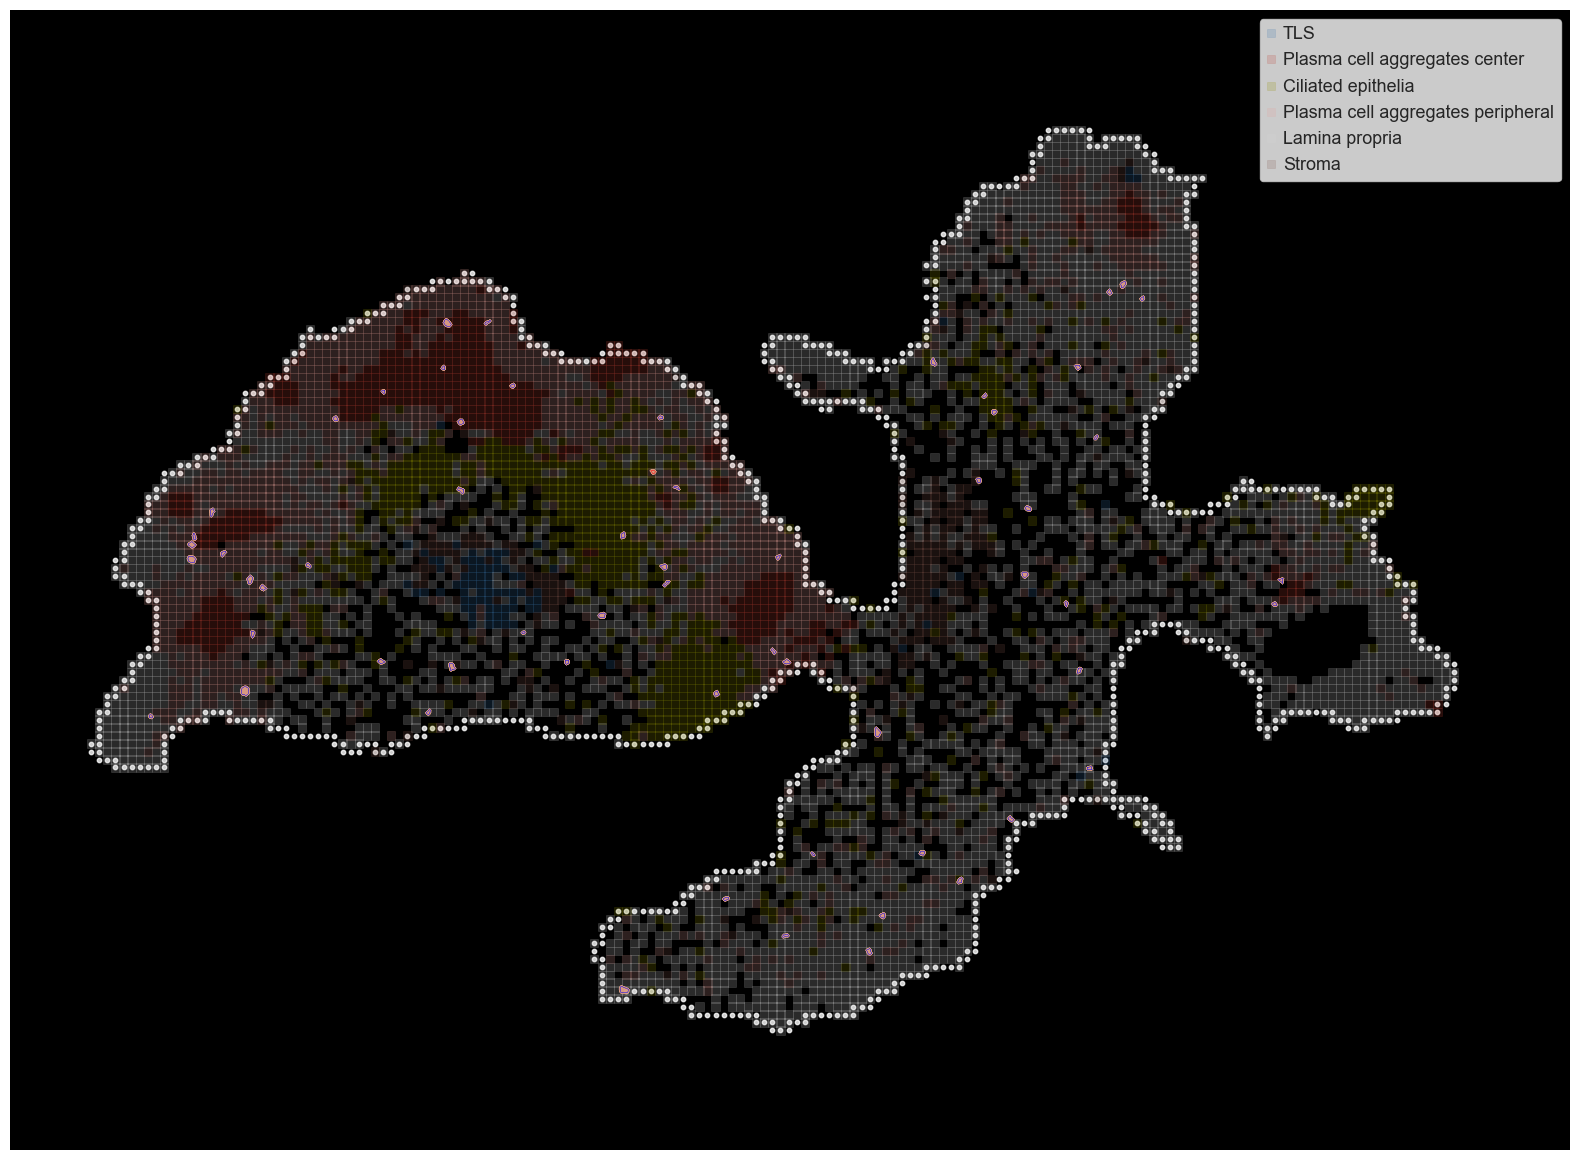

In [ ]:
m = 0 
for idx,row in germline2mutation.iterrows():
    germline = row['germline']
    m+=1
    color_dict = {}
    outline_dict = {}
    color = row['color']
    cdr3s = row['cdr3']
    
    for cdr3 in cdr3s:
        color_dict[cdr3] = color
        outline_dict[cdr3] = 'red'
    gcdr3 = row['germline']
    color_dict[gcdr3] = color
    outline_dict[gcdr3] = 'blue'

    cellidslist = []
    colorslist = []
    outlinelist = []
    for i in color_dict.keys():
        cells = query(cellbin,i)
        cellidslist.append(cells)
        colorslist.append(color_dict[i])
        outlinelist.append(outline_dict[i])
    background = rna.obs[['x','y']]
    background['value'] = rna.obs['annotation2']
    hull = cellbin.uns['hull']
    total_cell = list(set([ cell for i in cellidslist for cell in i]))
    fig,ax = plt.subplots(figsize = (20,15))
    ax.set_facecolor('black')
    ax.scatter(hull[:,0],hull[:,1],edgecolors = None, color = 'white', s = 10,alpha = 0.8,rasterized =True)
    sns.scatterplot(x = background['x'],y = background['y'],hue = background['value'],marker='s' ,palette=annocolor_dict,edgecolors=None,rasterized =True,alpha = 0.2,)

    subcellpose = cellbin.uns['cellpose'][cellbin.uns['cellpose']['cellID'].isin(total_cell)]
    suboutline = cellbin.uns['outline'][cellbin.uns['outline']['cellID'].isin(total_cell)]

    for cellids,color,outlinecolor in zip(cellidslist,colorslist,outlinelist):
        plotspot = subcellpose[subcellpose['cellID'].isin(cellids)]
        outlinespot = suboutline[suboutline['cellID'].isin(cellids)]
        ax.scatter(plotspot['x'],plotspot['y'],s = 0.01 ,color = color,edgecolors=None,rasterized =True)
        sns.scatterplot(x = outlinespot['x'],y = outlinespot['y'],color = outlinecolor,s = 0.05,edgecolors=None,rasterized =True,ax = ax)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.grid(False)
    ax.set_ylim(8500)
    ax.set_xlim(9000)
    fig.savefig(f'./Main_figure/plot{m}.{germline}.pdf')

In [768]:
color_dict = {}
outline_dict = {}
for idx,row in germline2mutation.iterrows():
    germline = row['germline']
    color = row['color']
    cdr3s = row['cdr3']
    
    for cdr3 in cdr3s:
        color_dict[cdr3] = color
        outline_dict[cdr3] = 'red'
    gcdr3 = row['germline']
    color_dict[gcdr3] = color
    outline_dict[gcdr3] = 'blue'

cellidslist = []
colorslist = []
outlinelist = []
for i in color_dict.keys():
    cells = query(cellbin,i)
    cellidslist.append(cells)
    colorslist.append(color_dict[i])
    outlinelist.append(outline_dict[i])

/tmp/ipykernel_155608/60735278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background['value'] = rna.obs['annotation2']


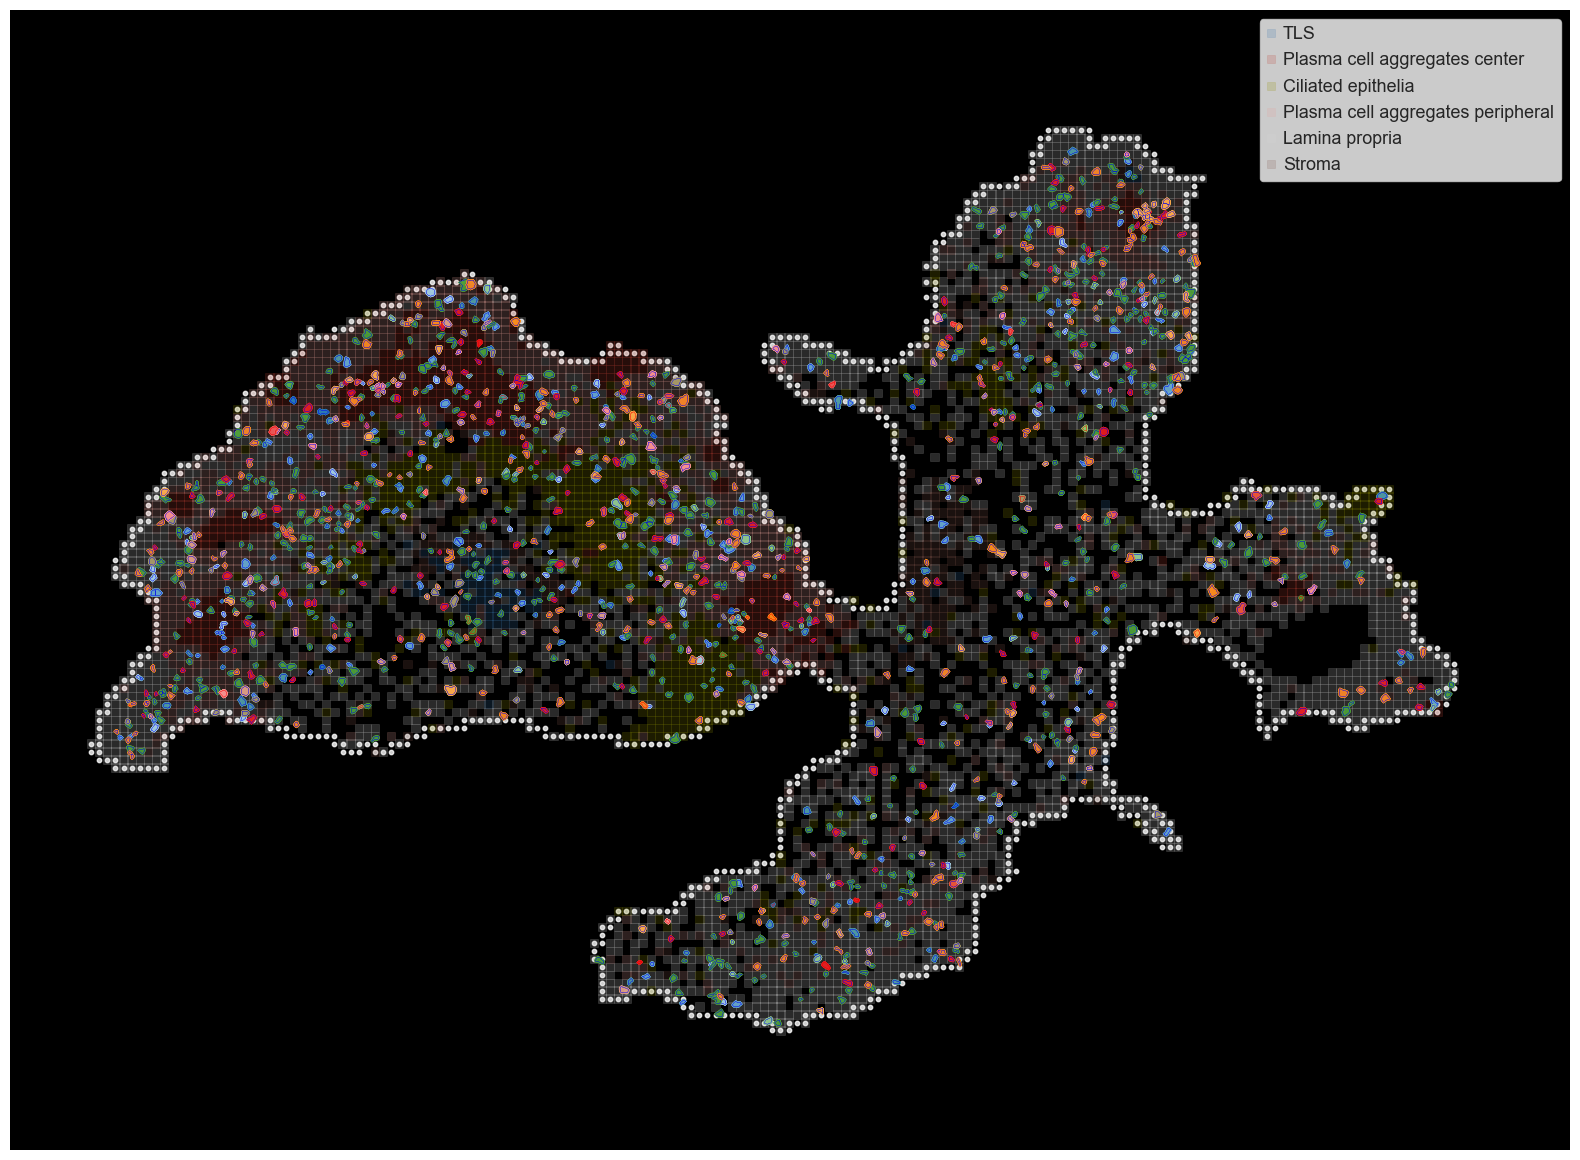

In [782]:
background = rna.obs[['x','y']]
background['value'] = rna.obs['annotation2']
hull = cellbin.uns['hull']
total_cell = list(set([ cell for i in cellidslist for cell in i]))
fig,ax = plt.subplots(figsize = (20,15))
ax.set_facecolor('black')
ax.scatter(hull[:,0],hull[:,1],edgecolors = None, color = 'white', s = 10,alpha = 0.8,rasterized =True)
sns.scatterplot(x = background['x'],y = background['y'],hue = background['value'],palette=annocolor_dict,marker='s' ,edgecolors=None,rasterized =True,alpha = 0.2,)

subcellpose = cellbin.uns['cellpose'][cellbin.uns['cellpose']['cellID'].isin(total_cell)]
suboutline = cellbin.uns['outline'][cellbin.uns['outline']['cellID'].isin(total_cell)]

for cellids,color,outlinecolor in zip(cellidslist,colorslist,outlinelist):
    plotspot = subcellpose[subcellpose['cellID'].isin(cellids)]
    outlinespot = suboutline[suboutline['cellID'].isin(cellids)]
    ax.scatter(plotspot['x'],plotspot['y'],s = 0.01 ,color = color,edgecolors=None,rasterized =True,alpha = 1)
    sns.scatterplot(x = outlinespot['x'],y = outlinespot['y'],color = outlinecolor,s = 0.05,edgecolors=None,rasterized =True,ax = ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.invert_yaxis()
ax.grid(False)
ax.set_ylim(8500)
ax.set_xlim(9000)
fig.savefig('./Main_figure/total.germline.pdf')

In [84]:
sub_disease_unqiue = disease_unqiue[disease_unqiue['type']=='IGL']
total_cells = []
for cdr3 in sub_disease_unqiue['CDR3']:
    cells = query(cellbin,cdr3)
    cells = pd.DataFrame({'cell':cells})
    cells['cdr3'] = cdr3
    total_cells.append(cells)
total_cells = pd.concat(total_cells,ignore_index=True)

In [88]:
p

Plasma cell aggregates center        0.155588
Plasma cell aggregates peripheral    0.142030
Lamina propria                       0.126368
Stroma                               0.110415
Ciliated epithelia                   0.108318
TLS                                  0.108108
Name: count, dtype: float64

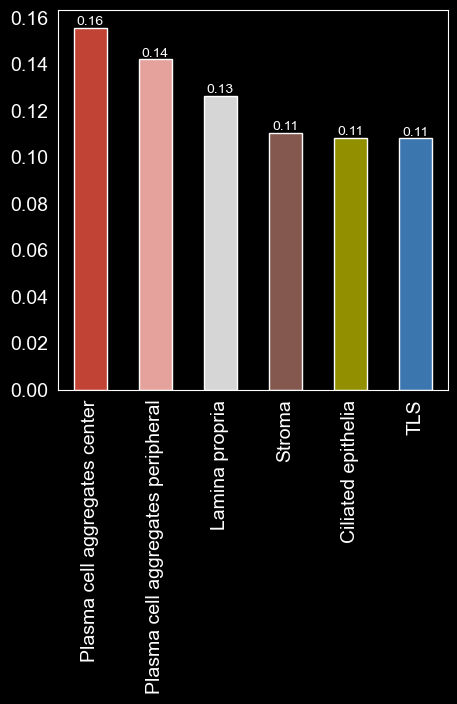

In [90]:
total_num = total_cells.shape[0]
vc = total_cells['cell'].map(annodict).value_counts()
p = vc/cellbin.obs['annotation2'].value_counts() 
p = p.sort_values(ascending=False)
fig,ax = plt.subplots(figsize = (5,5))
p.plot(kind='bar',ax = ax,color = p.index.map(annocolor_dict))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
for idx, value in enumerate(p):
    ax.text(idx, value, f'{value:.2f}', ha='center',color = 'white', va='bottom', fontsize=10)
ax.grid(False)
fig.savefig(f'./Main_figure/Fig4.region_disease_assciotate_cells_percentage.total_igl_{total_num}.pdf')

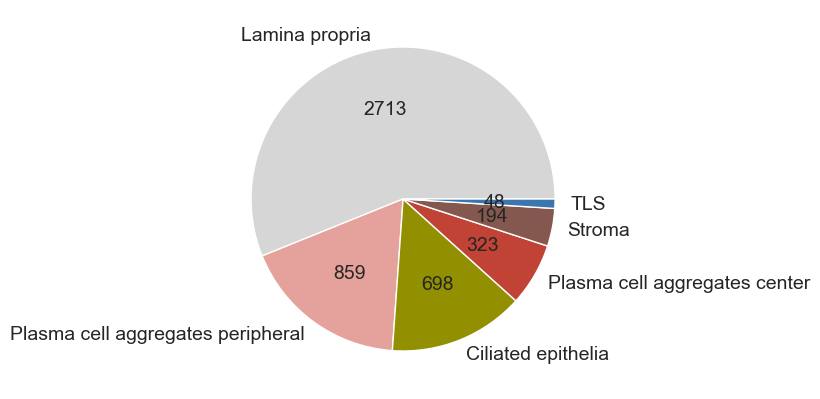

In [91]:
vc = total_cells['cell'].map(annodict).value_counts()
fig,ax = plt.subplots(figsize = (5,5))
total = vc.sum()
ax.pie(vc,labels = vc.index,colors = vc.index.map(annocolor_dict),autopct=lambda p: f'{absolute_value(p,total)}')
fig.savefig(f'./Main_figure/Fig4.region_disease_assciotate_cells_percentage.total_igl_{total_num}.pie.pdf')

In [92]:
sub_disease_unqiue = disease_unqiue[disease_unqiue['type']=='IGK']
total_cells = []
for cdr3 in sub_disease_unqiue['CDR3']:
    cells = query(cellbin,cdr3)
    cells = pd.DataFrame({'cell':cells})
    cells['cdr3'] = cdr3
    total_cells.append(cells)
total_cells = pd.concat(total_cells,ignore_index=True)
total_cells.shape[0]

4785

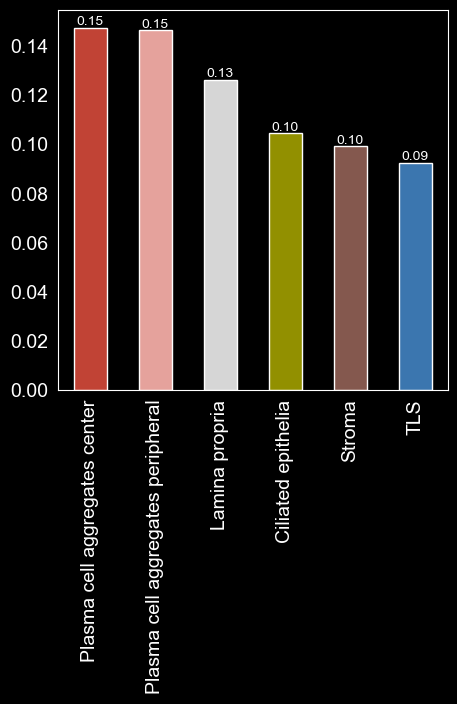

In [93]:
total_num = total_cells.shape[0]
vc = total_cells['cell'].map(annodict).value_counts()
p = vc/cellbin.obs['annotation2'].value_counts() 
p = p.sort_values(ascending=False)
fig,ax = plt.subplots(figsize = (5,5))
p.plot(kind='bar',ax = ax,color = p.index.map(annocolor_dict))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
for idx, value in enumerate(p):
    ax.text(idx, value, f'{value:.2f}', ha='center',color = 'white', va='bottom', fontsize=10)
ax.grid(False)
fig.savefig(f'./Main_figure/Fig4.region_disease_assciotate_cells_percentage.total_igk_{total_num}.pdf')

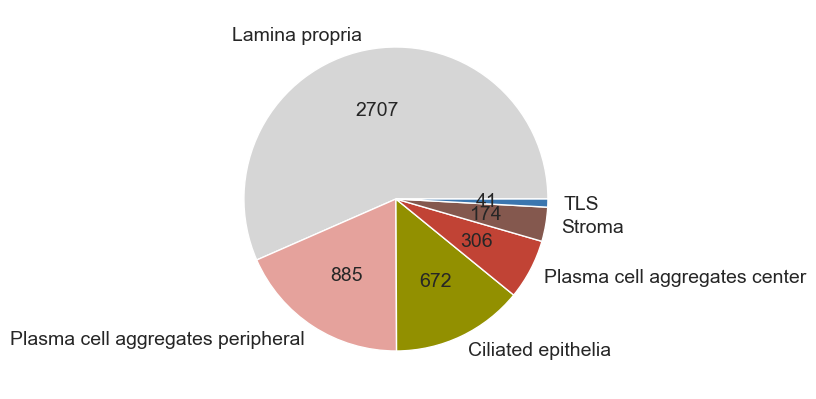

In [94]:
vc = total_cells['cell'].map(annodict).value_counts()
fig,ax = plt.subplots(figsize = (5,5))
total = vc.sum()
ax.pie(vc,labels = vc.index,colors = vc.index.map(annocolor_dict),autopct=lambda p: f'{absolute_value(p,total)}')
fig.savefig(f'./Main_figure/Fig4.region_disease_assciotate_cells_percentage.total_igl_{total_num}.pie.pdf')

In [95]:
sub_disease_unqiue = disease_unqiue[disease_unqiue['type']=='IGH']
total_cells = []
for cdr3 in sub_disease_unqiue['CDR3']:
    cells = query(cellbin,cdr3)
    cells = pd.DataFrame({'cell':cells})
    cells['cdr3'] = cdr3
    total_cells.append(cells)
total_cells = pd.concat(total_cells,ignore_index=True)
total_cells.shape[0]

3145

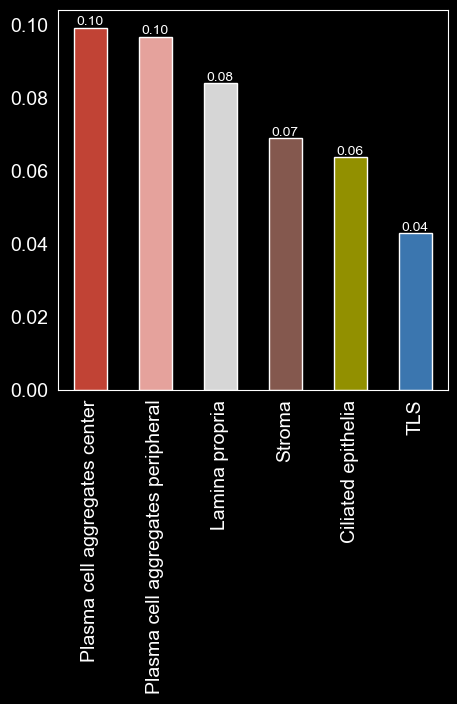

In [96]:
total_num = total_cells.shape[0]
vc = total_cells['cell'].map(annodict).value_counts()
p = vc/cellbin.obs['annotation2'].value_counts() 
p = p.sort_values(ascending=False)
fig,ax = plt.subplots(figsize = (5,5))
p.plot(kind='bar',ax = ax,color = p.index.map(annocolor_dict))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
for idx, value in enumerate(p):
    ax.text(idx, value, f'{value:.2f}', ha='center',color = 'white', va='bottom', fontsize=10)
ax.grid(False)
fig.savefig(f'./Main_figure/Fig4.region_disease_assciotate_cells_percentage.total_igh_{total_num}.pdf')

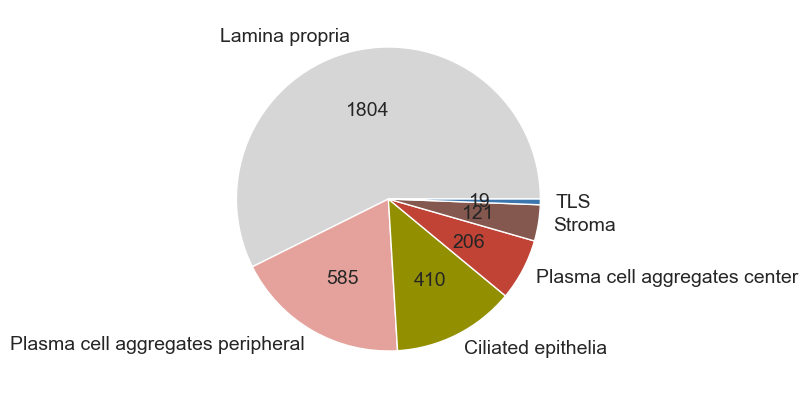

In [97]:
vc = total_cells['cell'].map(annodict).value_counts()
fig,ax = plt.subplots(figsize = (5,5))
total = vc.sum()
ax.pie(vc,labels = vc.index,colors = vc.index.map(annocolor_dict),autopct=lambda p: f'{absolute_value(p,total)}')
fig.savefig(f'./Main_figure/Fig4.region_disease_assciotate_cells_percentage.total_igl_{total_num}.pie.pdf')

In [817]:
disease_unqiue = disease_unqiue[disease_unqiue['type']=='IGL']

def b_appear(x):
    for i in x:
        if i.startswith('Plasma'):
            return 'Plasma cell aggregates'
    return 'Other'
        
def s_appear(x):
    center = False
    peripheral = False
    for i in x:
        if i == 'Plasma cell aggregates center':
            center = True
        elif i == 'Plasma cell aggregates peripheral':
            peripheral = True
    if center and peripheral:
        return "both"
    else:
        if center:
            return 'center'
        if peripheral:
            return 'peripheral'
        return 'None'
disease_unqiue['b_appear'] = disease_unqiue['appear'].map(b_appear)
sub_pca = disease_unqiue[disease_unqiue['b_appear'] == 'Plasma cell aggregates'].copy()
sub_pca['s_appear'] = sub_pca['appear'].map(s_appear)

/tmp/ipykernel_155608/3050542506.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_unqiue['b_appear'] = disease_unqiue['appear'].map(b_appear)


In [818]:
disease_unqiue['b_appear'].value_counts()

b_appear
Plasma cell aggregates    77
Other                     40
Name: count, dtype: int64

In [819]:
sub_pca['s_appear'].value_counts()

s_appear
both          53
peripheral    12
center        12
Name: count, dtype: int64

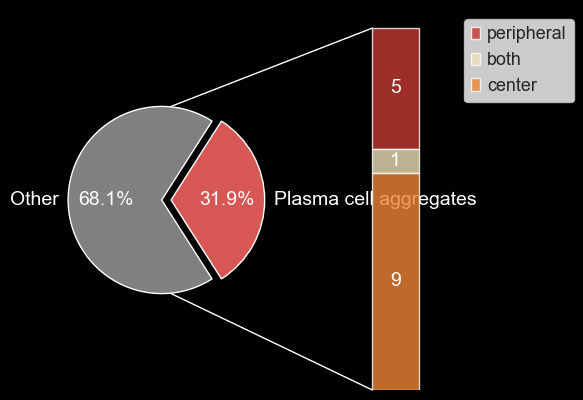

In [229]:
from matplotlib.patches import ConnectionPatch

overall_ratios = [15, 32]
labels = ['Plasma cell aggregates', 'Other']
colors = ['#D75755', 'grey']

bar_labels = ['center', 'both', 'peripheral']
bar_counts = [9, 1, 5]
total_immune_aggregates = sum(bar_counts)
bar_ratios = [count / total_immune_aggregates for count in bar_counts]
bar_colors = ['#EF8636', '#ECDEB5', '#C53A32']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5))
fig.subplots_adjust(wspace=0)

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

explode = [0.1, 0]  
angle = -180 * overall_ratios[0] / sum(overall_ratios)  
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors,textprops={'color': 'white'})

bottom = 1
width = 0.2

for j, (height, label, color,count) in enumerate(reversed(list(zip(bar_ratios, bar_labels, bar_colors,bar_counts)))):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=color, label=label,
                 alpha=0.8)
    ax2.bar_label(bc, labels=[f"{count}"], label_type='center',color = 'white')

ax2.legend(bbox_to_anchor = (1.3,1))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(bar_ratios)

x = center[0]
y = r
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData,color='white')  
# con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

x = center[0]
y = -r
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData,color='white')

# con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)
# plt.savefig('./Main_figure/Fig4E.pdf',bbox_inches = 'tight')
plt.show()

In [22]:
uniquecdr3 = spaxcr.tl.intersection(cellbin,groups = ['normal','disease'],groupby = 'label',chain = 'total',mode = 'total')
disease_unqiue = uniquecdr3[uniquecdr3['Occurance'] == 'disease'].copy()
shared_unique = uniquecdr3[uniquecdr3['Occurance'] == 'ALL'].copy()

In [23]:
normalcdr3 = uniquecdr3[uniquecdr3['Occurance'].isin(['ALL','normal'])]
diseasecdr3 = uniquecdr3[uniquecdr3['Occurance'].isin(['ALL','disease'])]

In [24]:
disease_result = []
for chain in  ['TRA','TRB','IGH','IGK','IGL']:
    df = spaxcr.tl.clonestat(cellbin[cellbin.obs['label'] == 'disease'],chains = chain)
    df['chain'] = chain
    disease_result.append(df)
disease_result = pd.concat(disease_result)

normal_result = []
for chain in  ['TRA','TRB','IGH','IGK','IGL']:
    df = spaxcr.tl.clonestat(cellbin[cellbin.obs['label'] == 'normal'],chains = chain)
    df['chain'] = chain
    normal_result.append(df)
normal_result = pd.concat(normal_result)

In [25]:
share_disease_result =  disease_result[disease_result['CDR3'].isin(diseasecdr3['CDR3'])].copy()
share_normal_result =  normal_result[normal_result['CDR3'].isin(normalcdr3['CDR3'])].copy()

In [26]:
share_disease_result['region'] = 'disease'
share_normal_result['region']= 'normal'
result = pd.concat([share_disease_result,share_normal_result])

In [27]:
share_normal_result = share_normal_result.sort_values('n_cells',ascending=False,ignore_index=True)
share_normal_result['rank'] = range(share_normal_result.shape[0])
normal_rank = dict(zip(share_normal_result['CDR3'],share_normal_result['rank']))
share_disease_result['normal_rank'] = share_disease_result['CDR3'].map(normal_rank)
share_disease_result = share_disease_result.sort_values('n_cells',ascending=False,ignore_index=True)
share_disease_result['disease_rank'] = range(share_disease_result.shape[0])

In [28]:
share_disease_result['CDR3']

0        CMIWHSGAWVF@IGL
1      CARDRFCVTFDIW@IGH
2        CQCSGYPIDYW@IGH
3       CSSYTTSNTVVF@IGL
4      CFSYAGHNKPPLL@IGL
             ...        
420    YAAWDDSLNAWVF@IGL
421      CMQALQTPVTF@IGK
422      CQQYFQTPFTF@IGK
423       CQQYDKWPSF@IGK
424      CQQTYTSPRTF@IGK
Name: CDR3, Length: 425, dtype: object

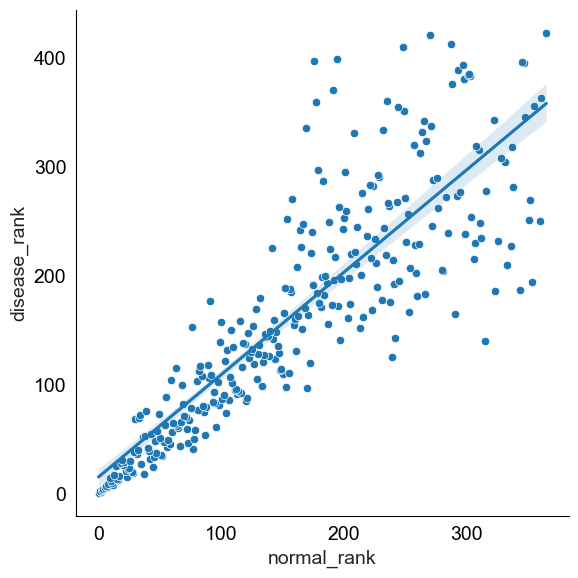

In [29]:
share_disease_result['disease_unique'] = share_disease_result['CDR3'].isin(disease_unqiue['CDR3'])

g = sns.lmplot(data=share_disease_result, x='normal_rank', y='disease_rank',height=6,scatter_kws = {'s': 0})
for ax in g.axes.flatten():
    sns.scatterplot(data = share_disease_result,x='normal_rank', y='disease_rank',ax = ax)
    ax.grid(False)

In [34]:
share_disease_result = share_disease_result.dropna()

In [35]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(share_disease_result['normal_rank'], share_disease_result['disease_rank'])

In [36]:
r_value

0.8605919126263607

In [37]:
p_value

5.786028999983779e-92

In [837]:
def absolute_value(pct,total):
    return int(round(pct*total/100.0))

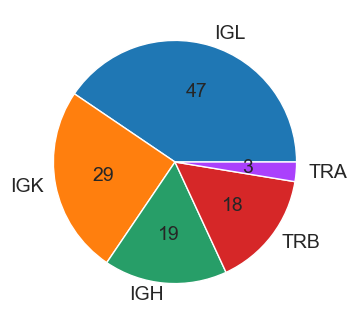

In [841]:
disease_unqiue['chain'] = disease_unqiue['CDR3'].map(lambda x : x.split('@')[1])
vc = disease_unqiue['chain'].value_counts()
total = vc.sum()
plt.pie(vc,labels = vc.index,autopct=lambda p: f'{absolute_value(p,total)}')
plt.savefig('./Sup8/Sup9.disease_119.chain_distribution.pdf',bbox_inches = 'tight')

In [839]:
disease_unqiue

CDR3 Occurance chain
367   CCLYAGSNTFMEF@IGL   disease   IGL
368    CAIDRHSVSDRW@IGH   disease   IGH
369   CQSYEDSLSDVLF@IGL   disease   IGL
370     CMQYNSWLYTF@IGK   disease   IGK
371     CMQGLQTPLTF@IGK   disease   IGK
..                  ...       ...   ...
478   CYTYAGHNKPPLL@IGL   disease   IGL
479  CASSLVGRGGGYTF@TRB   disease   TRB
480   CSAWDDSLNSPVF@IGL   disease   IGL
481     CLQATYWPPTF@IGK   disease   IGK
482   CSAWDSSPSAWVF@IGL   disease   IGL

[116 rows x 3 columns]

# figure4j

In [34]:
subbin = bin50[:,bin50.var['BCRstatus'] == 'germline']
subbin = spaxcr.pp.updatexcr(subbin)

Chain
> Update IGH-CDR3: 1058 → 360
> Update IGK-CDR3: 1000 → 268
> Update IGL-CDR3: 717 → 177
> Update TRA-CDR3: 13 → 0
> Update TRB-CDR3: 122 → 0

BCR Isotype:
>> Update IGHA-CDR3: 966 → 325
>> Update IGHG-CDR3: 45 → 22


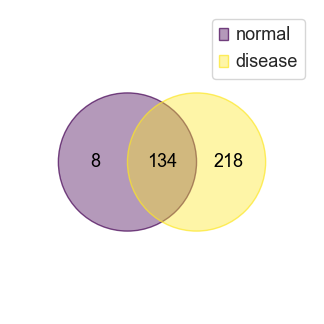

In [35]:
spaxcr.pl.intersection(subbin,groups = ['normal','disease'],groupby = 'label',chain = 'IGH',figsize = (4,4))#save = './Main_figure/Fig4J.normal_disease.cdr3.IGH.venn.pdf')

Chain
> Update IGH-CDR3: 1058 → 698
> Update IGK-CDR3: 1000 → 732
> Update IGL-CDR3: 717 → 540
> Update TRA-CDR3: 13 → 0
> Update TRB-CDR3: 122 → 0

BCR Isotype:
>> Update IGHA-CDR3: 966 → 641
>> Update IGHG-CDR3: 45 → 23


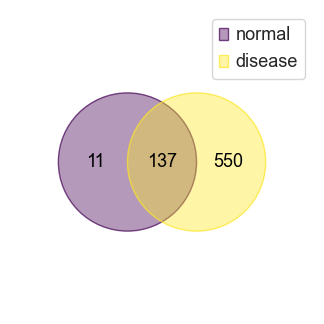

In [36]:
subbin = bin50[:,bin50.var['BCRstatus'] == 'mutated']
subbin = spaxcr.pp.updatexcr(subbin)
spaxcr.pl.intersection(subbin,groups = ['normal','disease'],groupby = 'label',chain = 'IGH',figsize = (4,4),save = './Main_figure/Fig4J.normal_disease.cdr3.IGH.mutated.venn.pdf')